# Housing prices solution

In [2]:
%reset -f
import gc
gc.collect()

0

Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
sns.set_style('darkgrid')

Loading data

In [6]:
df_train = pd.read_csv('train.csv', index_col='Id')
df_test = pd.read_csv('test.csv', index_col='Id')

In [7]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [9]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df_train.shape

(1460, 80)

In [11]:
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
df_test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Preprocessing

Heatmap for the first half of the features

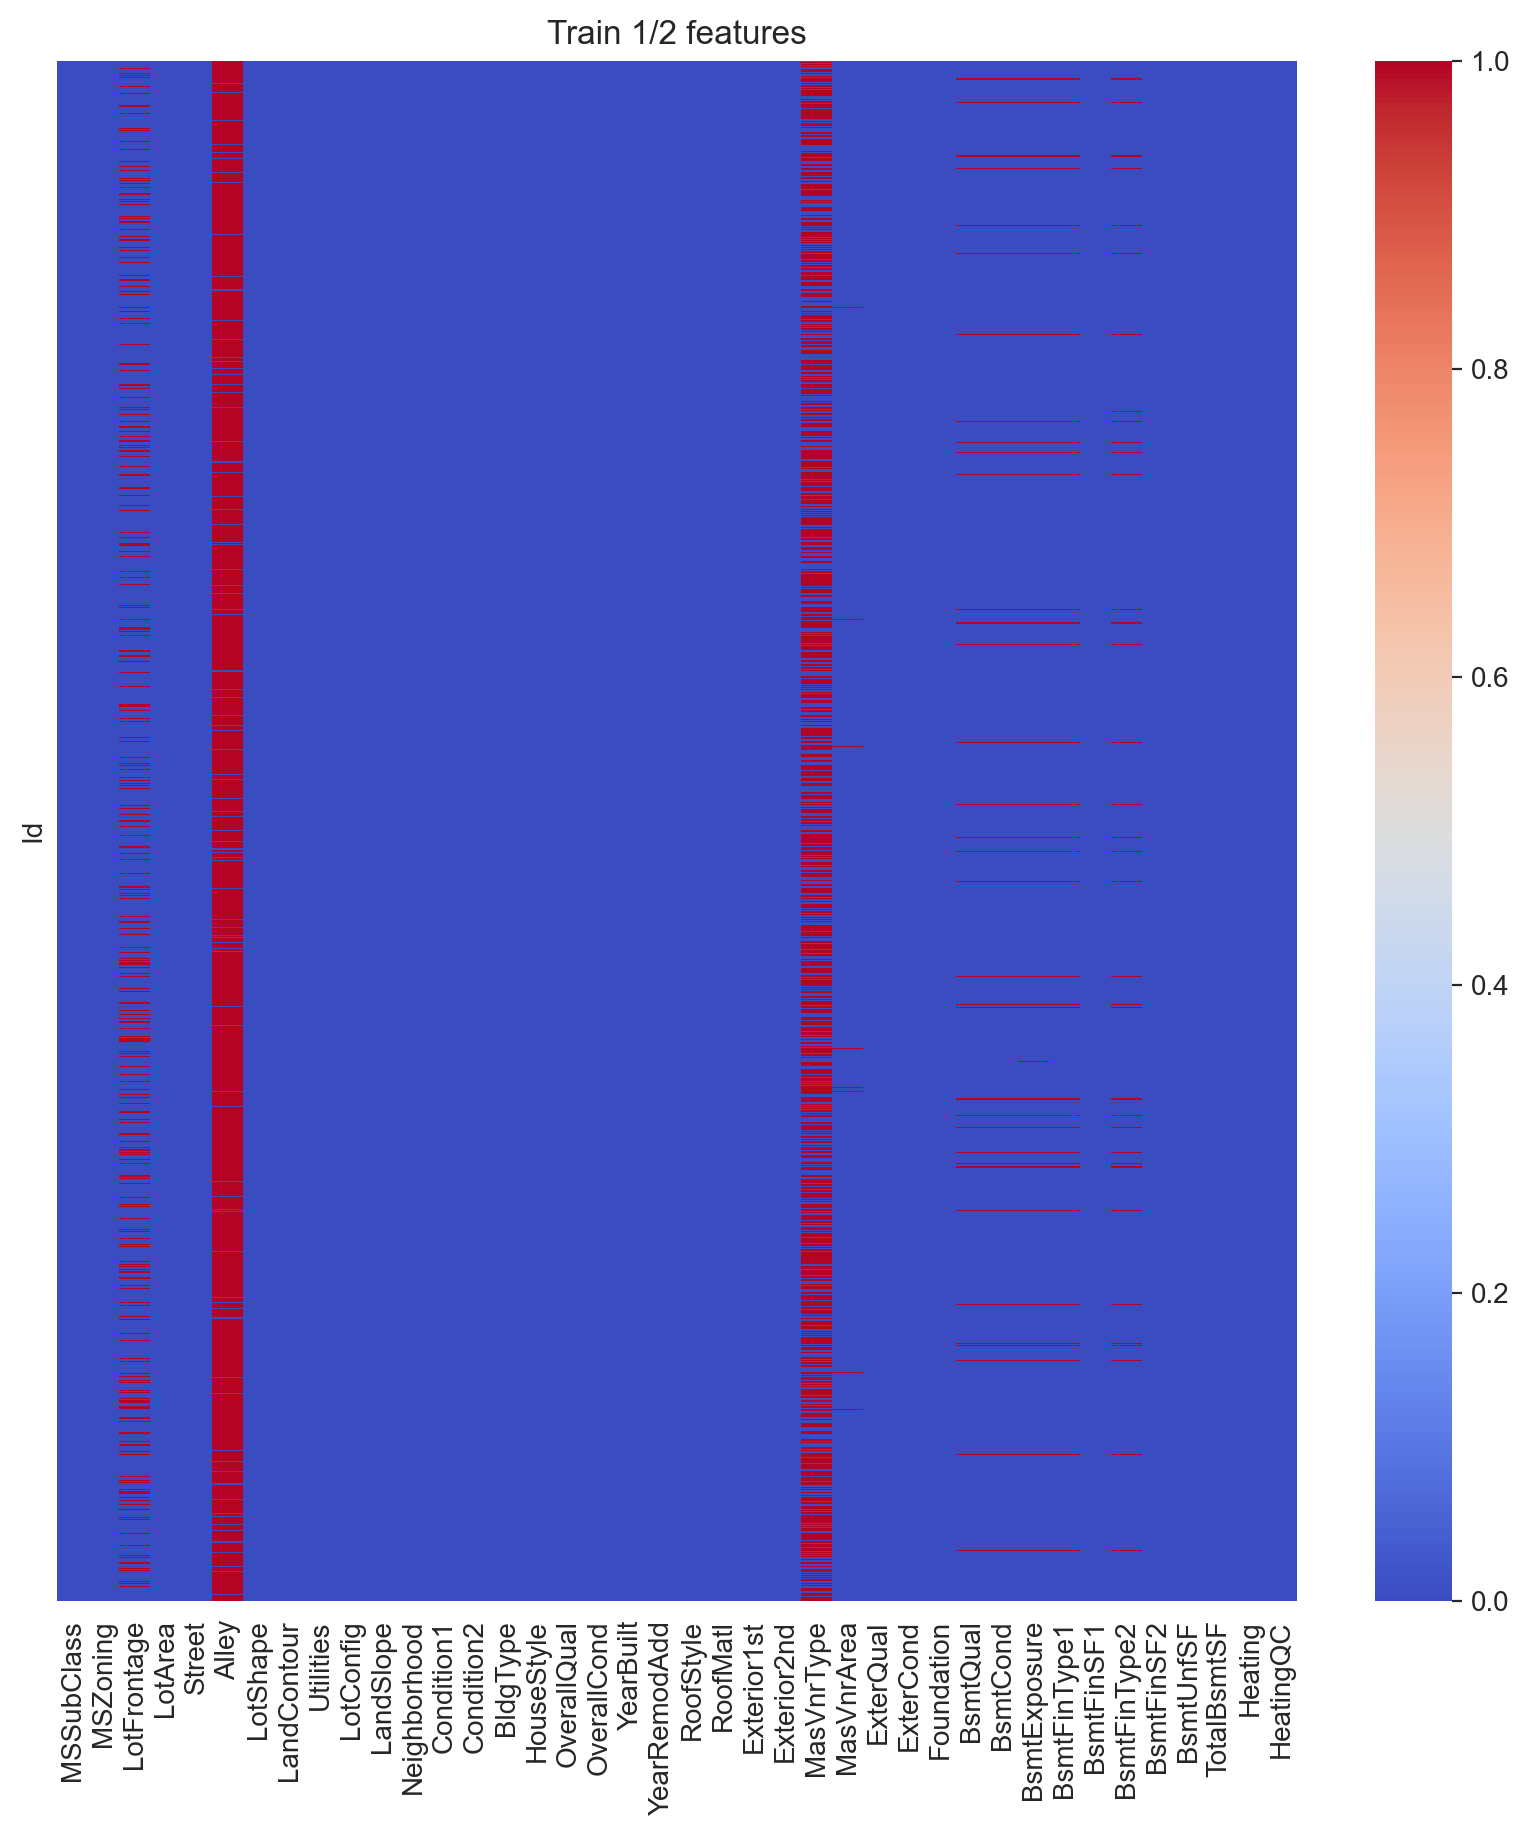

In [13]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(data=df_train.iloc[:, :40].isnull(), cmap='coolwarm', yticklabels=False)
plt.title('Train 1/2 features')
plt.show()

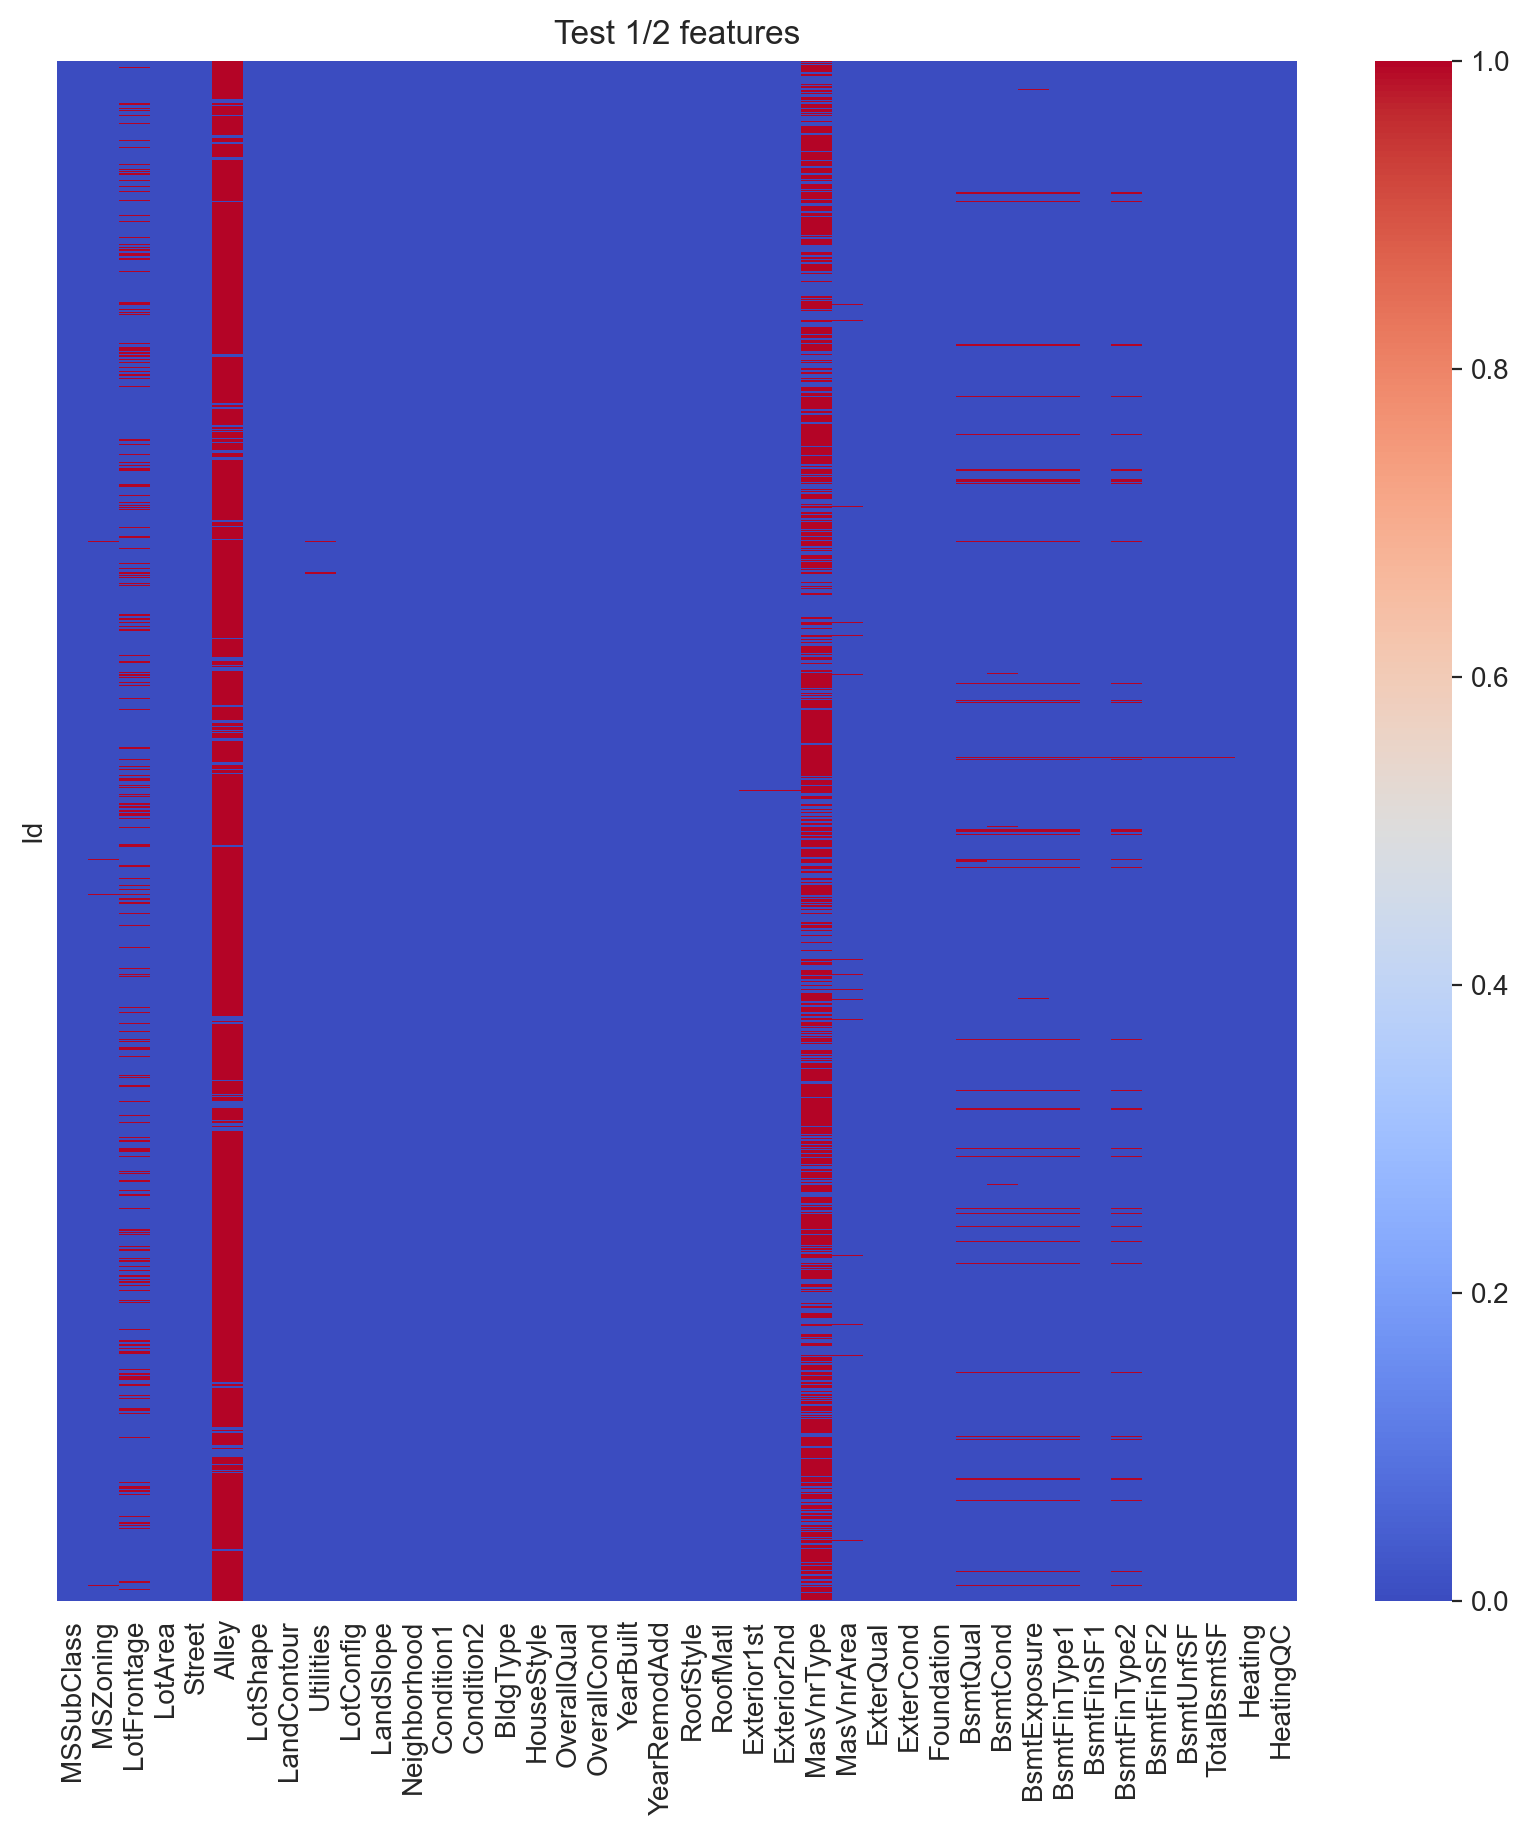

In [14]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(data=df_test.iloc[:, :40].isnull(), cmap='coolwarm', yticklabels=False)
plt.title('Test 1/2 features')
plt.show()

Heatmap for the second half of the features

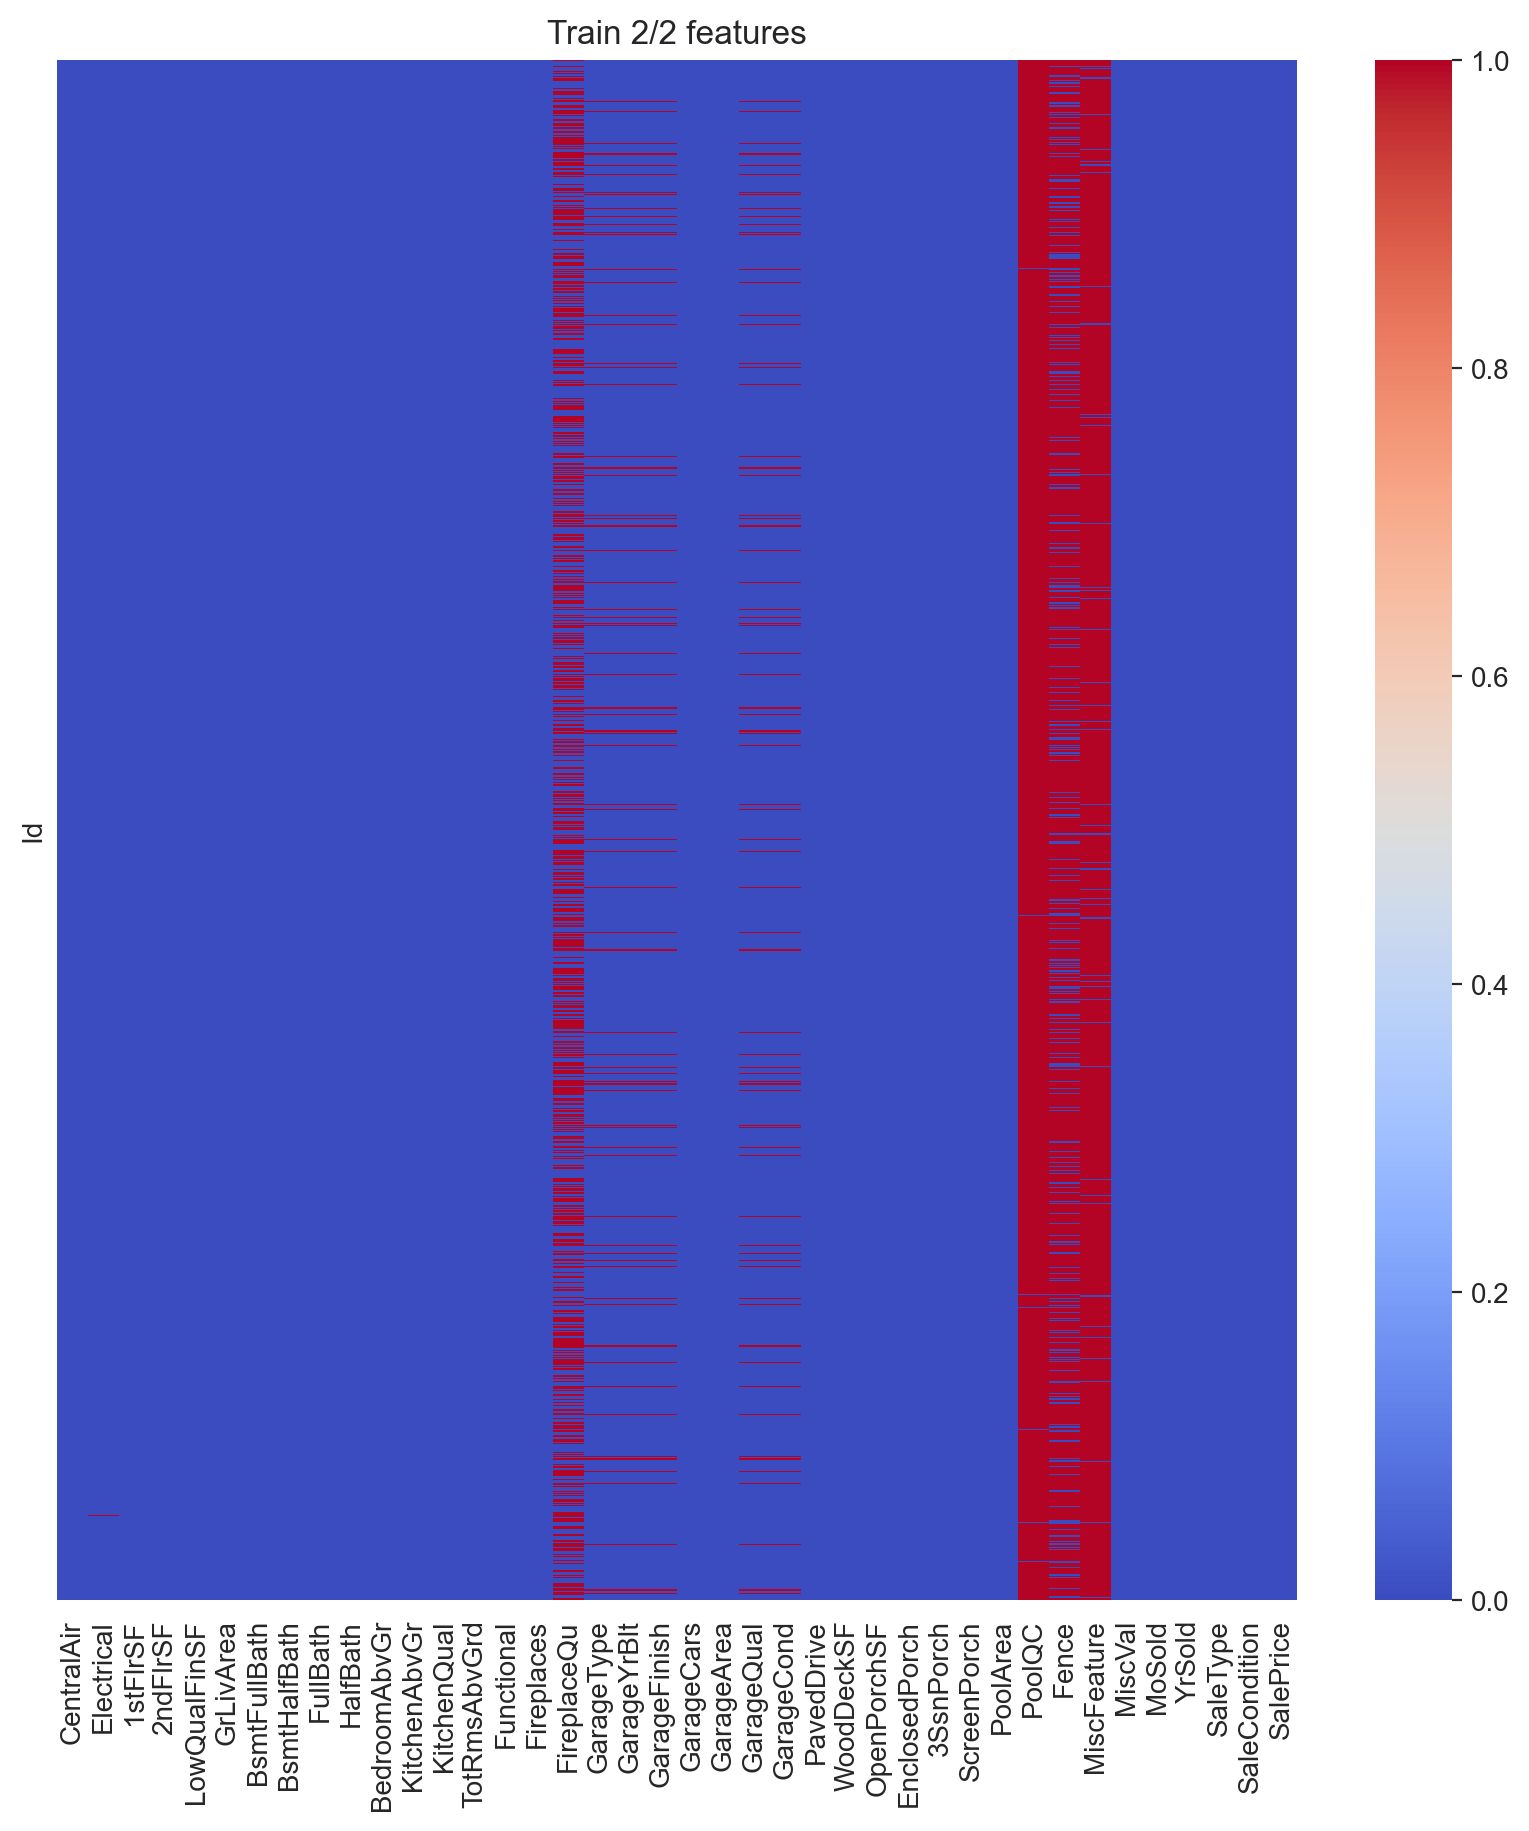

In [15]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(data=df_train.iloc[:, 40:].isnull(), cmap='coolwarm', yticklabels=False)
plt.title('Train 2/2 features')
plt.show()

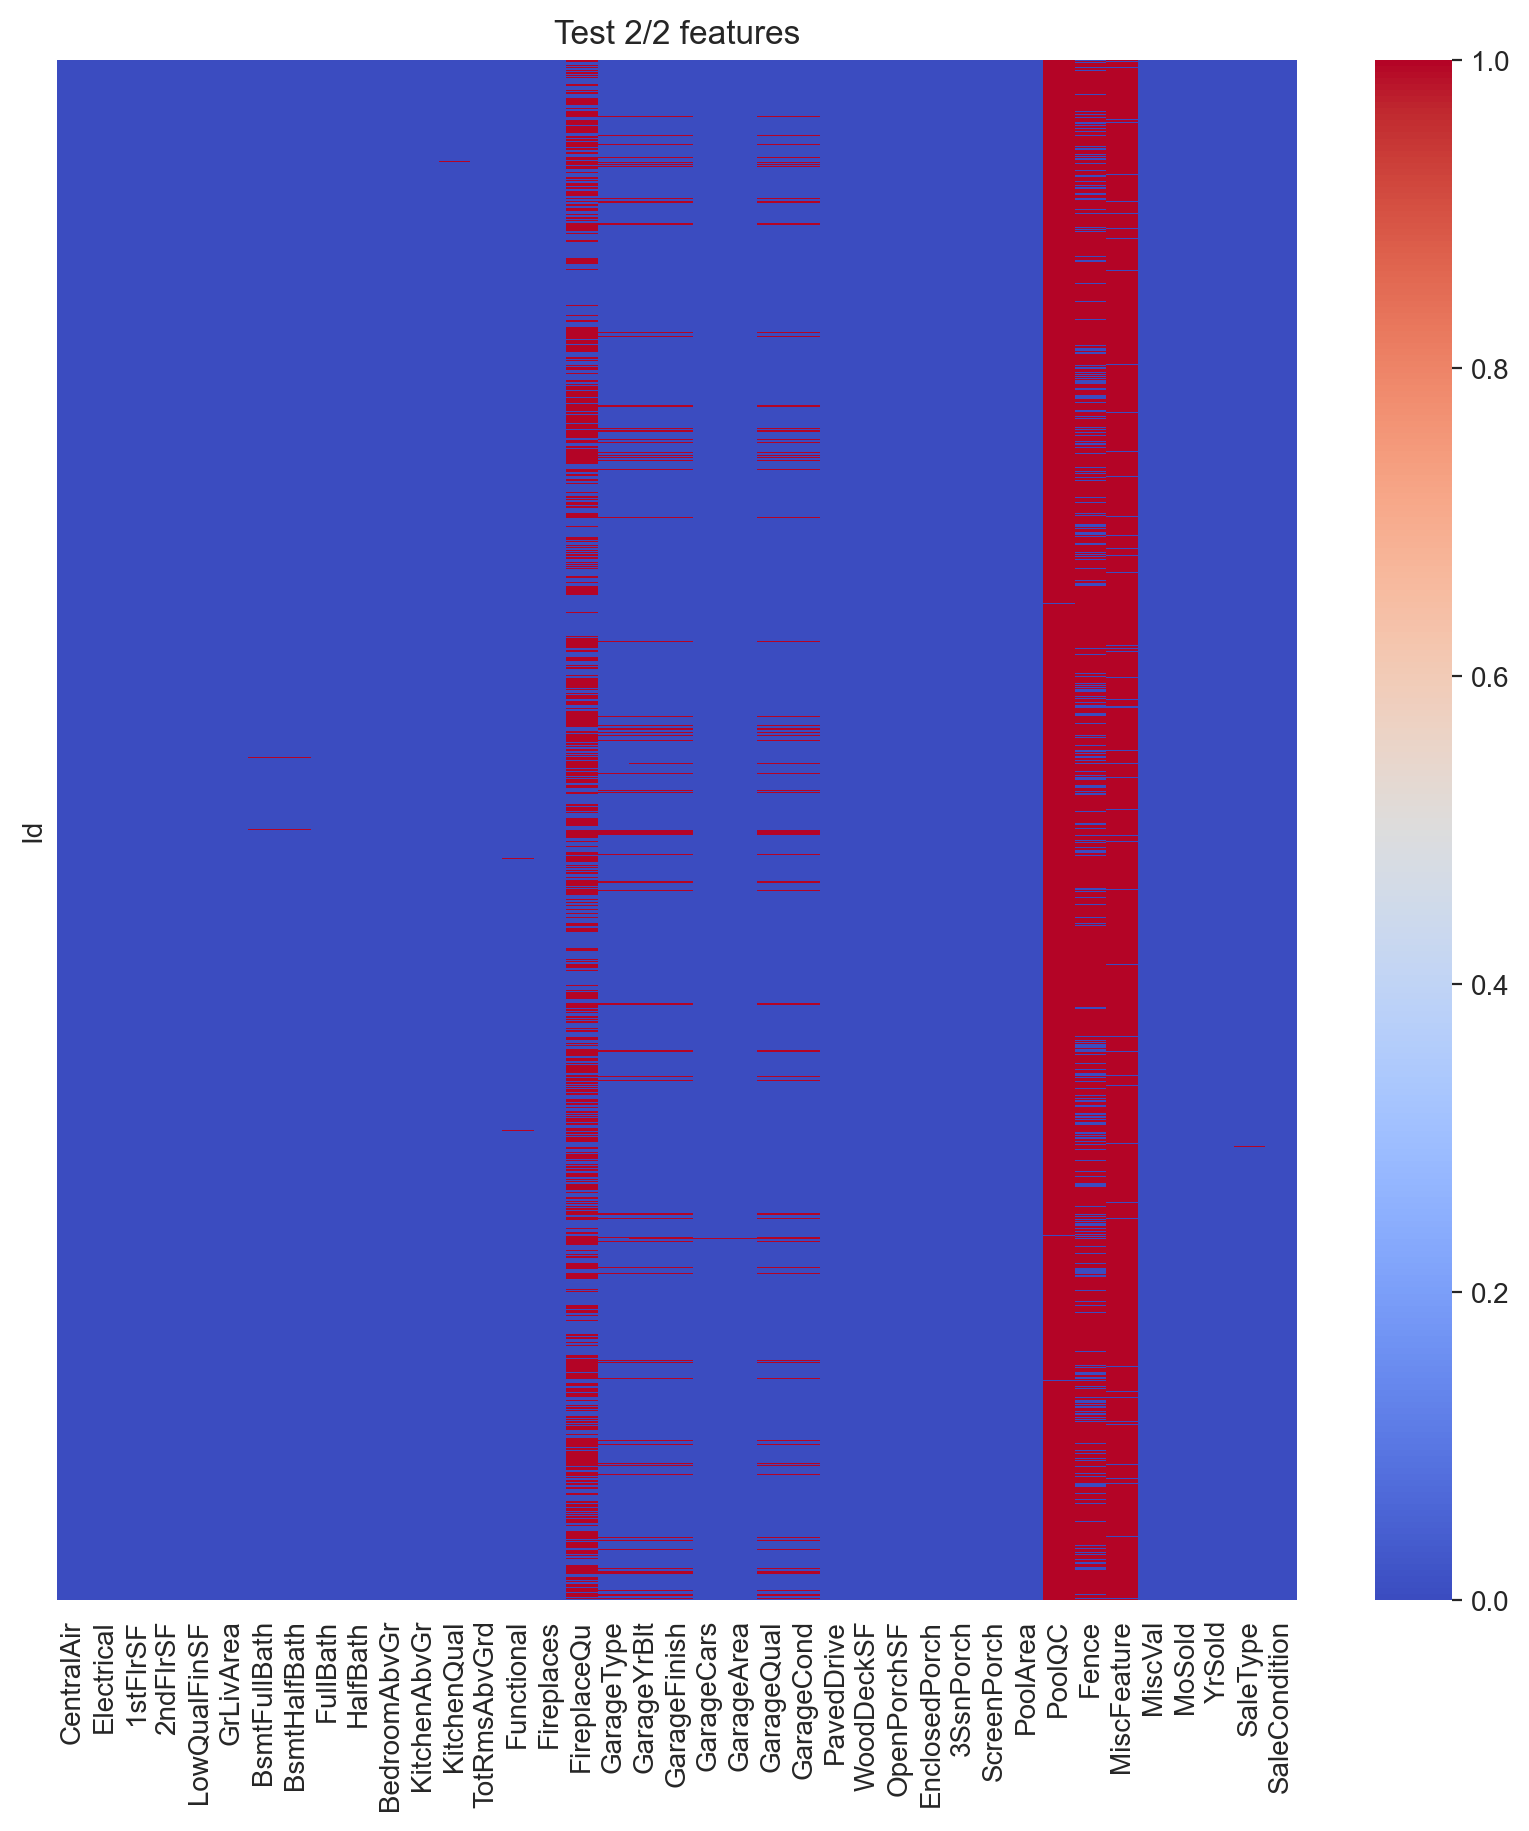

In [16]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(data=df_test.iloc[:, 40:].isnull(), cmap='coolwarm', yticklabels=False)
plt.title('Test 2/2 features')
plt.show()

### NA handling

#### Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

In [17]:
df_train['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [18]:
df_train['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

According to data documentation NaN values mean that there is no alley so we fill them with NA string

In [19]:
df_train['Alley'] = df_train['Alley'].fillna('NA')
df_test['Alley'] = df_test['Alley'].fillna('NA')

In [20]:
df_train['Alley'].isna().any()

np.False_

In [21]:
df_test['Alley'].isna().any()

np.False_

#### MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MasVnrArea: Masonry veneer area in square feet

Let's a bit explore these two features

In [22]:
df_train['MasVnrType'].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [23]:
df_train['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [24]:
df_test['MasVnrType'].value_counts()

MasVnrType
BrkFace    434
Stone      121
BrkCmn      10
Name: count, dtype: int64

In [25]:
df_test['MasVnrType'].unique()

array([nan, 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

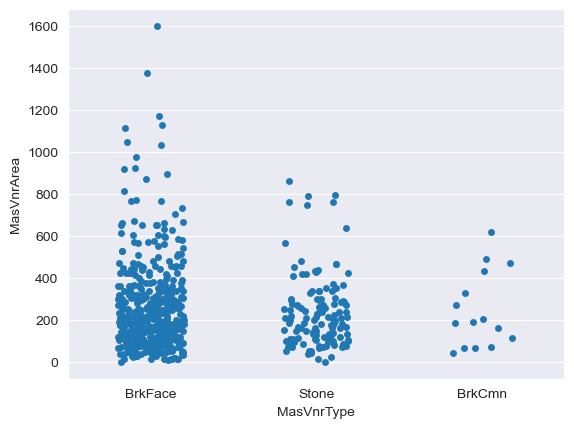

In [26]:
sns.stripplot(data=df_train, x='MasVnrType', y='MasVnrArea', jitter=0.2)
plt.show()

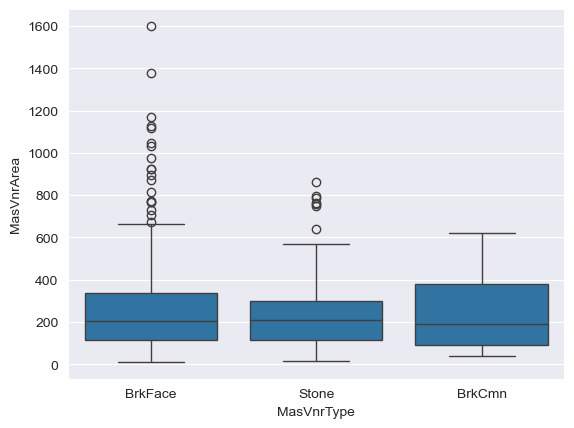

In [27]:
sns.boxplot(data=df_train[df_train['MasVnrArea'] != 0], x='MasVnrType', y='MasVnrArea')
plt.show()

Fill NaN values in MasVnrArea with median value (except 0)

In [28]:
MasVnrArea_median = df_train[df_train['MasVnrArea'] != 0]['MasVnrArea'].median()
MasVnrArea_median

203.0

In [29]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(MasVnrArea_median)
df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(MasVnrArea_median)

In [30]:
df_train['MasVnrArea'].isna().any(), df_test['MasVnrArea'].isna().any()

(np.False_, np.False_)

In [31]:
df_test['MasVnrType'].value_counts()

MasVnrType
BrkFace    434
Stone      121
BrkCmn      10
Name: count, dtype: int64

In [32]:
df_test['MasVnrType'].unique()

array([nan, 'BrkFace', 'Stone', 'BrkCmn'], dtype=object)

Let's see if all the MasVnrArea values near to 0 has MasVnrType

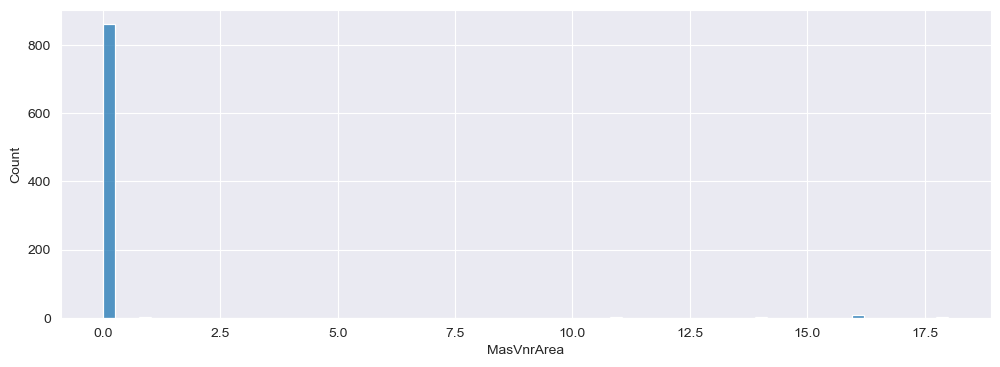

In [33]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df_train, x='MasVnrArea', binrange=(0, 18), bins=70)
plt.show()

In [34]:
df_train[df_train['MasVnrArea'] < 20]['MasVnrArea'].value_counts()

MasVnrArea
0.0     861
16.0      7
18.0      2
1.0       2
11.0      1
14.0      1
Name: count, dtype: int64

In [35]:
df_test[df_test['MasVnrArea'] < 20]['MasVnrArea'].value_counts()

MasVnrArea
0.0     877
16.0      4
14.0      3
3.0       1
1.0       1
18.0      1
Name: count, dtype: int64

In [36]:
df_train[(df_train['MasVnrArea'] > 0) & (df_train['MasVnrArea'] < 5)][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
Id,,
774,1.0,NaN
1231,1.0,NaN


In [37]:
df_test[(df_test['MasVnrArea'] > 0) & (df_test['MasVnrArea'] < 5)][['MasVnrArea', 'MasVnrType']]

,MasVnrArea,MasVnrType
Id,,
1766,3.0,BrkFace
2453,1.0,NaN


Probably 1 sq feet Area is a mistake and it should be 0.0

In [38]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].replace(1.0, 0.0)
df_test['MasVnrArea'] = df_test['MasVnrArea'].replace(1.0, 0.0)

Replace NaN with BrkFace if MasVnrArea is not 0.0

In [39]:
df_train.loc[df_train['MasVnrArea'] != 0, 'MasVnrType'] = df_train.loc[df_train['MasVnrArea'] != 0, 'MasVnrType'].fillna('BrkFace')
df_test.loc[df_test['MasVnrArea'] != 0, 'MasVnrType'] = df_test.loc[df_test['MasVnrArea'] != 0, 'MasVnrType'].fillna('BrkFace')

Other missing values we're filling with NA value (because MasVnrArea is 0)

In [40]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('NA')
df_test['MasVnrType'] = df_test['MasVnrType'].fillna('NA')

In [41]:
df_train['MasVnrType'].isna().any()

np.False_

In [42]:
df_test['MasVnrType'].isna().any()

np.False_

#### LotFrontage: Linear feet of street connected to property

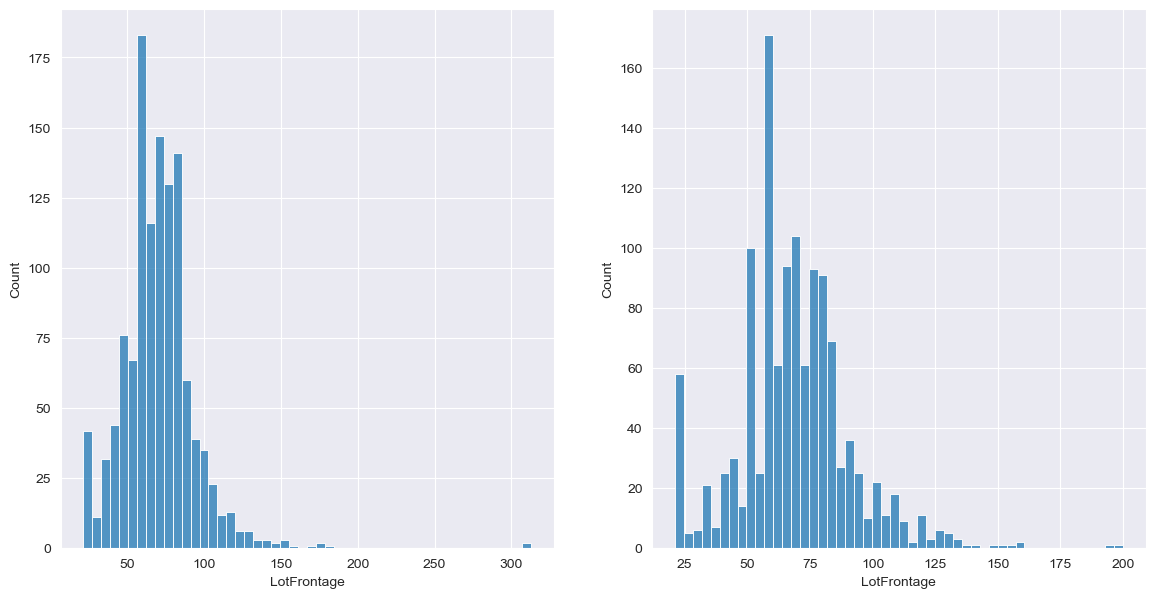

In [43]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='LotFrontage', bins=50)
plt.subplot(1, 2, 2)
sns.histplot(data=df_test, x='LotFrontage', bins=50)
plt.show()

In [44]:
df_train[df_train['LotFrontage'] < 10]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [45]:
df_train['LotFrontage'].isna().sum()

np.int64(259)

In [46]:
df_test['LotFrontage'].isna().sum()

np.int64(227)

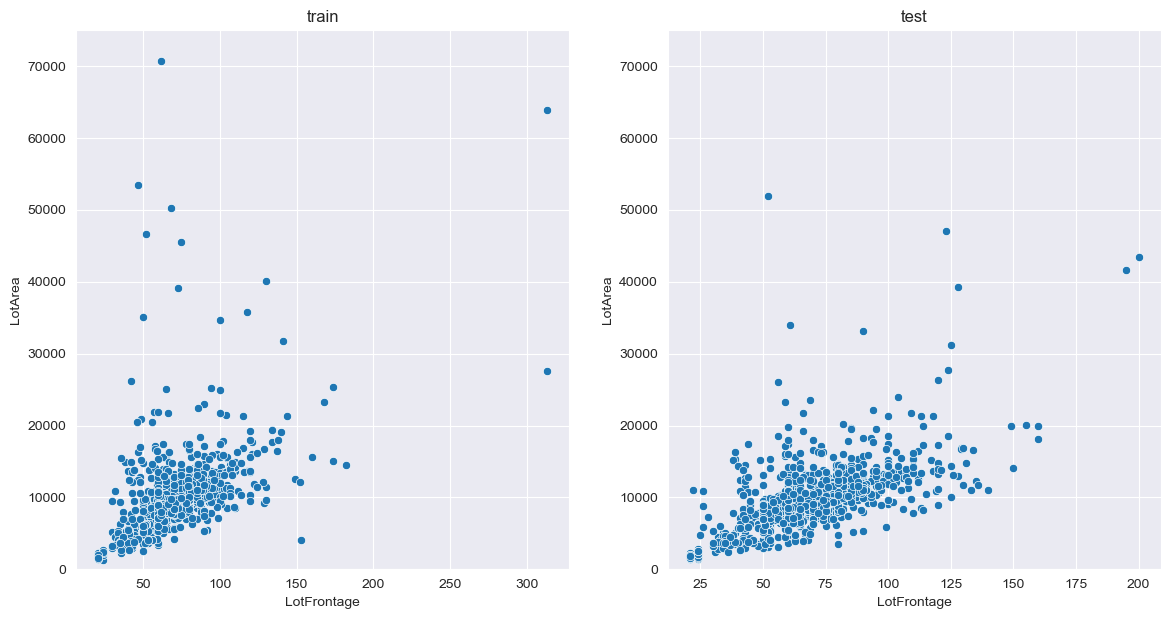

In [47]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_train, x='LotFrontage', y='LotArea')
plt.ylim([0,75000])
plt.title('train')
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_test, x='LotFrontage', y='LotArea')
plt.ylim([0,75000])
plt.title('test')
plt.show()

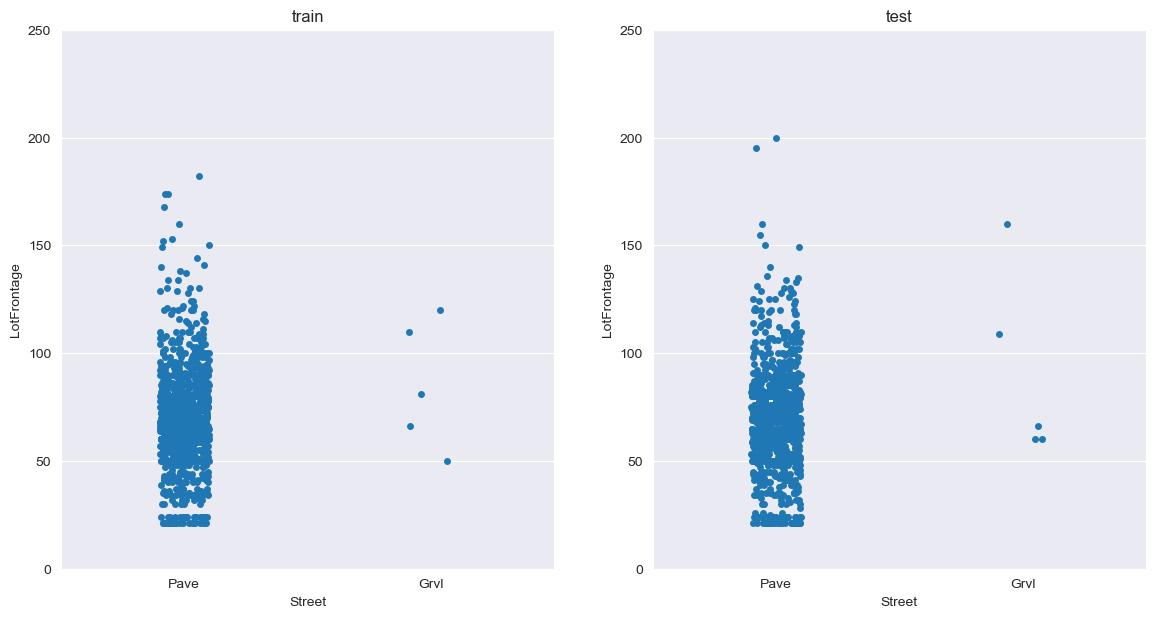

In [48]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
sns.stripplot(data=df_train, x='Street', y='LotFrontage')
plt.ylim([0, 250])
plt.title('train')
plt.subplot(1, 2, 2)
sns.stripplot(data=df_test, x='Street', y='LotFrontage')
plt.ylim([0, 250])
plt.title('test')
plt.show()

In [49]:
df_train['LotFrontage'].mean(), df_train['LotFrontage'].median()

(np.float64(70.04995836802665), 69.0)

In [50]:
df_test['LotFrontage'].mean(), df_test['LotFrontage'].median()

(np.float64(68.58035714285714), 67.0)

Filling LotFrontage NaN with mean value

In [51]:
LotFrontageMean = df_train['LotFrontage'].mean()
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(LotFrontageMean)
df_test['LotFrontage'] = df_test['LotFrontage'].fillna(LotFrontageMean)

In [52]:
df_train['LotFrontage'].isna().any()

np.False_

In [53]:
df_test['LotFrontage'].isna().any()

np.False_

#### MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [54]:
df_train['MSZoning'].isna().any()

np.False_

In [55]:
df_test['MSZoning'].isna().sum()

np.int64(4)

In [56]:
df_test[df_test['MSZoning'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,NaN,109.000000,21780,Grvl,NA,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
2217,20,NaN,80.000000,14584,Pave,NA,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,NA,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml
2251,70,NaN,70.049958,56600,Pave,NA,IR1,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,NaN,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal
2905,20,NaN,125.000000,31250,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,NA,0.0,TA,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,NaN,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


Let's fill NaN with most frequent value

In [57]:
df_train['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [58]:
df_test['MSZoning'] = df_test['MSZoning'].fillna('RL')

In [59]:
df_test['MSZoning'].isna().any()

np.False_

#### Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [60]:
df_train['Utilities'].isna().any()

np.False_

In [61]:
df_test[df_test['Utilities'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1916,30,RL,109.000000,21780,Grvl,NA,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,Fa,Fa,CBlock,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,NaN,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,NaN,NaN,NaN,0,3,2009,ConLD,Normal
1946,20,RL,70.049958,31220,Pave,NA,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,NA,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,NaN,NaN,Shed,750,5,2008,WD,Normal


In [62]:
df_train['Utilities'].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [63]:
df_test['Utilities'].unique()

array(['AllPub', nan], dtype=object)

Replacing NaN values with AllPub

In [64]:
df_test['Utilities'] = df_test['Utilities'].fillna('AllPub')

In [65]:
df_test['Utilities'].isna().any()

np.False_

Exterior1st: Exterior covering on house

In [66]:
df_train['Exterior1st'].isna().any()

np.False_

In [67]:
df_test[df_test['Exterior1st'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2152,30,RL,85.0,19550,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,NaN,NaN,NA,0.0,TA,TA,PConc,TA,TA,Gd,ALQ,1035.0,Unf,0.0,545.0,1580.0,GasA,Ex,Y,SBrkr,1518,0,0,1518,1.0,0.0,1,0,2,1,Fa,5,Typ,2,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,39,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [68]:
df_train['Exterior1st'].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

Filling NaN with VinylSd value

In [69]:
df_test['Exterior1st'] = df_test['Exterior1st'].fillna('VinylSd')

In [70]:
df_test['Exterior1st'].isna().any()

np.False_

#### Exterior2nd: Exterior covering on house (if more than one material)

In [71]:
df_train['Exterior2nd'].isna().any()

np.False_

In [72]:
df_test[df_test['Exterior2nd'].isna()].iloc[:, :30]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2152,30,RL,85.0,19550,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,7,1940,2007,Flat,Tar&Grv,VinylSd,NaN,NA,0.0,TA,TA,PConc,TA


In [73]:
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna('VinylSd')

In [74]:
df_test['Exterior2nd'].isna().any()

np.False_

#### Basement features

##### TotalBsmtSF: Total square feet of basement area

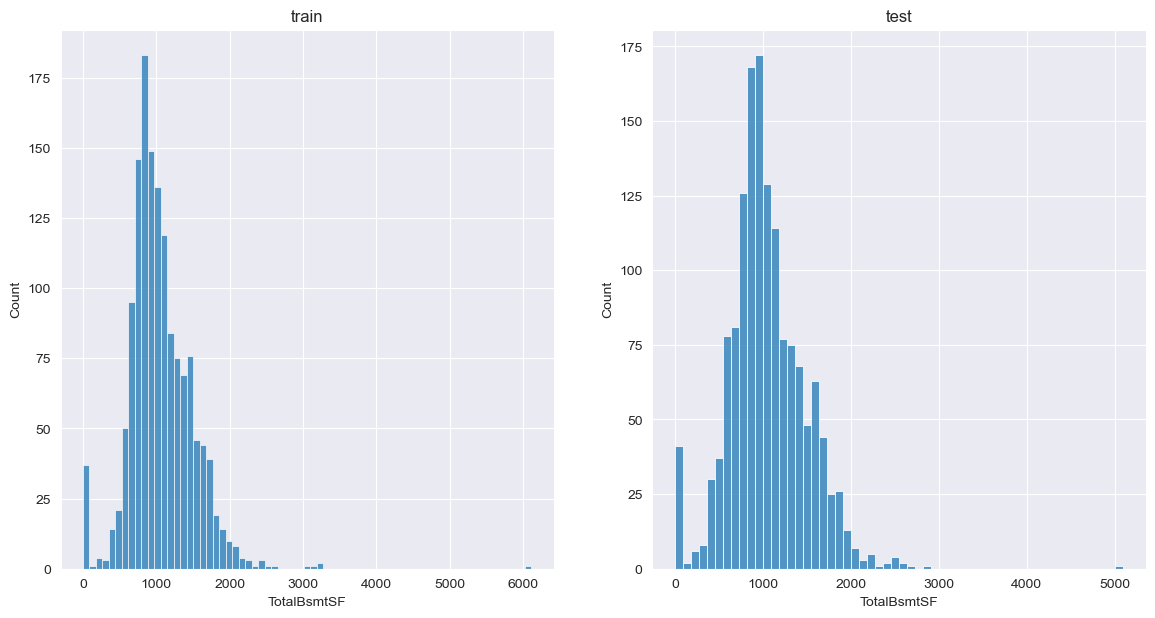

In [75]:
plt.figure(figsize=(14,7))
plt.subplot(1, 2, 1)
sns.histplot(data=df_train, x='TotalBsmtSF')
plt.title('train')
plt.subplot(1, 2, 2)
sns.histplot(data=df_test, x='TotalBsmtSF')
plt.title('test')
plt.show()

In [76]:
df_train['TotalBsmtSF'].isna().any()

np.False_

In [77]:
df_test['TotalBsmtSF'].isna().sum()

np.int64(1)

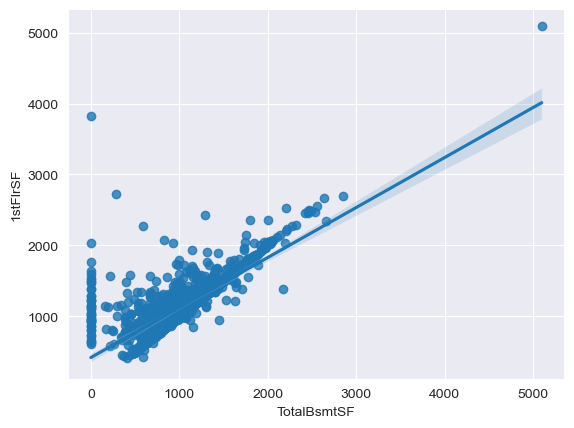

In [78]:
sns.regplot(data=df_test, x='TotalBsmtSF', y='1stFlrSF')
plt.show()

The only object in the test data with missing TotalBsmtSF probably means that in this house no basement at all

In [79]:
df_test[df_test['TotalBsmtSF'].isna()][[n for n in df_test.columns if 'Bsmt' in n]]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
2121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So we fill total surface with 0

In [80]:
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].fillna(0)

In [81]:
df_test['TotalBsmtSF'].isna().any()

np.False_

##### BsmtFinSF1: Type 1 finished square feet and BsmtFinSF2: Type 2 finished square feet



In [82]:
df_train['BsmtFinSF1'].isna().any(), df_train['BsmtFinSF2'].isna().any()

(np.False_, np.False_)

In [83]:
df_test['BsmtFinSF1'].isna().sum(), df_test['BsmtFinSF2'].isna().sum()

(np.int64(1), np.int64(1))

In [84]:
df_test[df_test['BsmtFinSF1'].isna()][['TotalBsmtSF', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinSF2']]

,TotalBsmtSF,BsmtFinType1,BsmtFinSF1,BsmtFinType1,BsmtFinSF2
Id,,,,,
2121,0.0,NaN,NaN,NaN,NaN


In [85]:
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(0)
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(0)

In [86]:
df_test['BsmtFinSF1'].isna().any(), df_test['BsmtFinSF2'].isna().any()

(np.False_, np.False_)

##### BsmtUnfSF: Unfinished square feet of basement area

In [87]:
df_test[df_test['BsmtUnfSF'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2121,20,RM,99.0,5940,Pave,NA,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,NA,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml


NaN means no basement. So fill with 0

In [88]:
df_test['BsmtUnfSF'] = df_test['BsmtUnfSF'].fillna(0.0)

In [89]:
df_train['BsmtUnfSF'].isna().any(), df_test['BsmtUnfSF'].isna().any()

(np.False_, np.False_)

##### BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
NaN means No Basement (NA)

In [90]:
bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
no_bsmt_condition = df_train[bsmt_cols].isna().all(axis=1)
df_train.loc[no_bsmt_condition, bsmt_cols] = 'NA'

In [91]:
no_bsmt_condition = df_test[bsmt_cols].isna().all(axis=1)
df_test.loc[no_bsmt_condition, bsmt_cols] = 'NA'

BsmtExposure: Refers to walkout or garden level walls

Fill with the most frequent value if basement exists

In [92]:
df_train[df_train['BsmtExposure'].isna()][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
949,Gd,TA,NaN,Unf,Unf


In [93]:
df_train['BsmtExposure'].value_counts()

BsmtExposure
No    953
Av    221
Gd    134
Mn    114
NA     37
Name: count, dtype: int64

In [94]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna('No')

In [95]:
df_test[df_test['BsmtExposure'].isna()][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
1488,Gd,TA,NaN,Unf,Unf
2349,Gd,TA,NaN,Unf,Unf


In [96]:
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna('No')

In [97]:
df_train['BsmtExposure'].isna().any(), df_test['BsmtExposure'].isna().any()

(np.False_, np.False_)

BsmtFinType2: Rating of basement finished area (if multiple types)

In [98]:
bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

In [99]:
df_train[df_train['BsmtFinType2'].isna()][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
333,Gd,TA,No,GLQ,1124,NaN,479,1603,3206


In [100]:
df_train[(df_train['BsmtFinSF2'] != 0) & (df_train['BsmtFinType1'] == 'GLQ')]['BsmtFinType2'].value_counts()

BsmtFinType2
LwQ    10
Rec     9
ALQ     4
BLQ     2
Name: count, dtype: int64

In [101]:
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna('LwQ')

In [102]:
df_train['BsmtFinType2'].isna().any(), df_test['BsmtFinType2'].isna().any()

(np.False_, np.False_)

In [103]:
df_train.iloc[:, :40].isna().any().any()

np.False_

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

In [104]:
df_test[df_test['BsmtQual'].isna()][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
2218,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0
2219,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0


In [105]:
df_test[(df_test['BsmtCond'] == 'Fa') & (df_test['TotalBsmtSF'] < 500)]['BsmtQual'].value_counts()

BsmtQual
Fa    5
Name: count, dtype: int64

In [106]:
df_test[(df_test['BsmtCond'] == 'TA') & (df_test['TotalBsmtSF'] < 500)]['BsmtQual'].value_counts()

BsmtQual
TA    23
Gd    22
Fa     7
Ex     1
Name: count, dtype: int64

Fill BsmtQual with same as BsmtCond

In [107]:
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtCond'])

In [108]:
df_test['BsmtQual'].isna().any()

np.False_

BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [109]:
df_test[df_test['BsmtCond'].isna()][bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
Id,,,,,,,,,
2041,Gd,NaN,Mn,GLQ,1044.0,Rec,382.0,0.0,1426.0
2186,TA,NaN,No,BLQ,1033.0,Unf,0.0,94.0,1127.0
2525,TA,NaN,Av,ALQ,755.0,Unf,0.0,240.0,995.0


In [110]:
df_test[(df_test['BsmtQual'].isin(['TA', 'Gd'])) & (df_test['TotalBsmtSF'] > 700)]['BsmtCond'].value_counts()

BsmtCond
TA    967
Gd     38
Fa     32
Po      1
Name: count, dtype: int64

Fill BsmtCond with the most frequent value

In [111]:
df_test['BsmtCond'] = df_test['BsmtCond'].fillna('TA')

In [112]:
df_test['BsmtCond'].isna().any()

np.False_

In [113]:
df_train.iloc[:, :40].isna().any().any(), df_test.iloc[:, :40].isna().any().any()

(np.False_, np.False_)

First half of the features are done

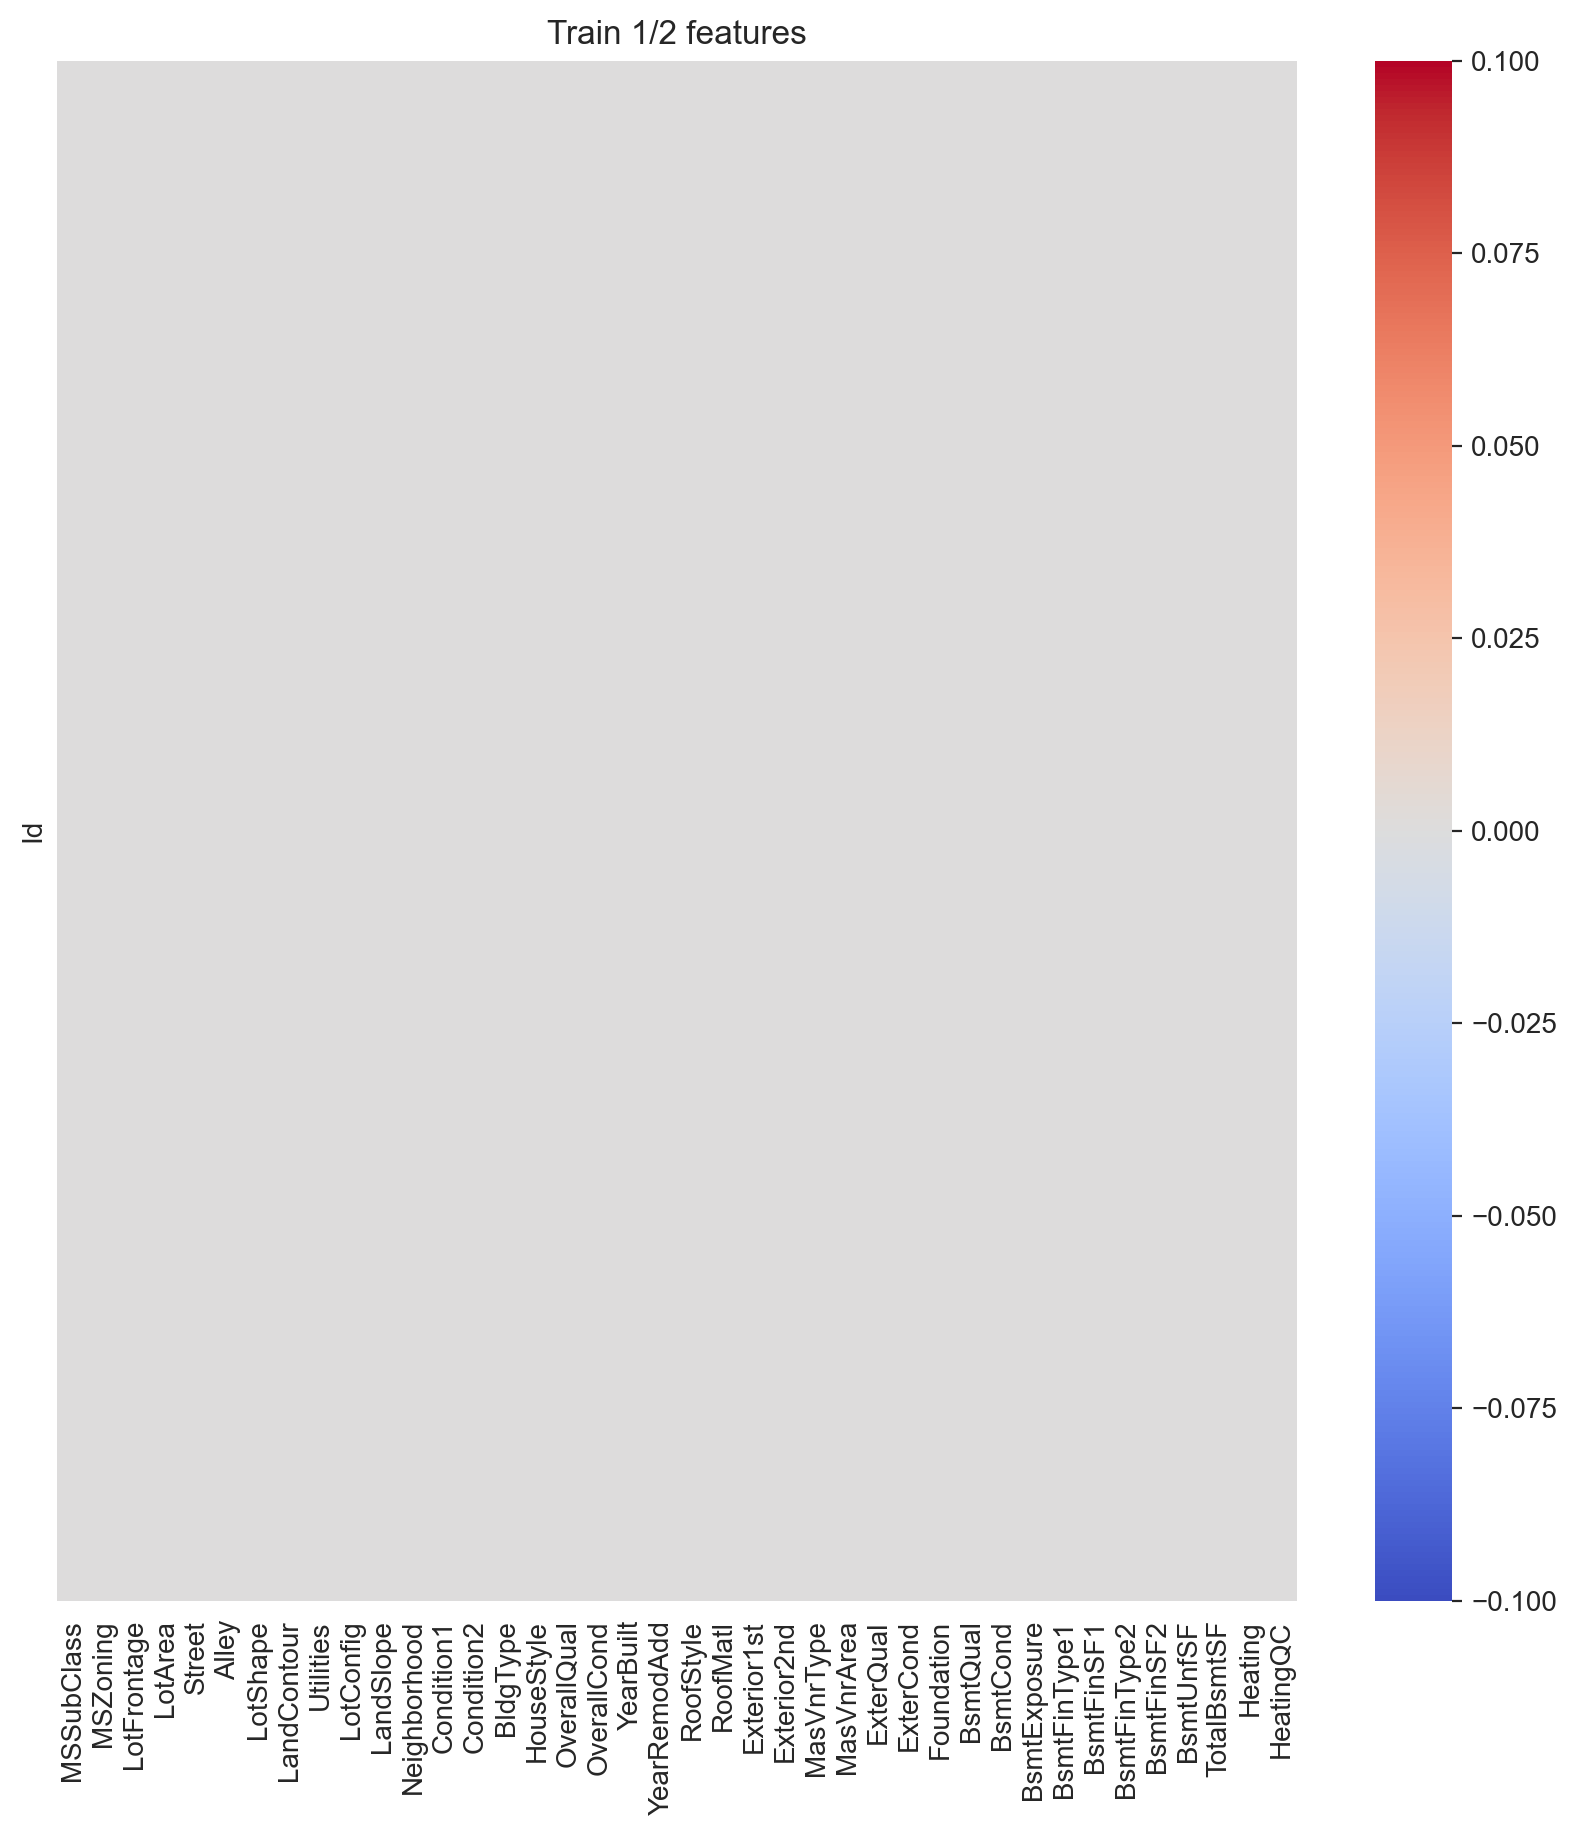

In [114]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(data=df_train.iloc[:, :40].isnull(), cmap='coolwarm', yticklabels=False)
plt.title('Train 1/2 features')
plt.show()

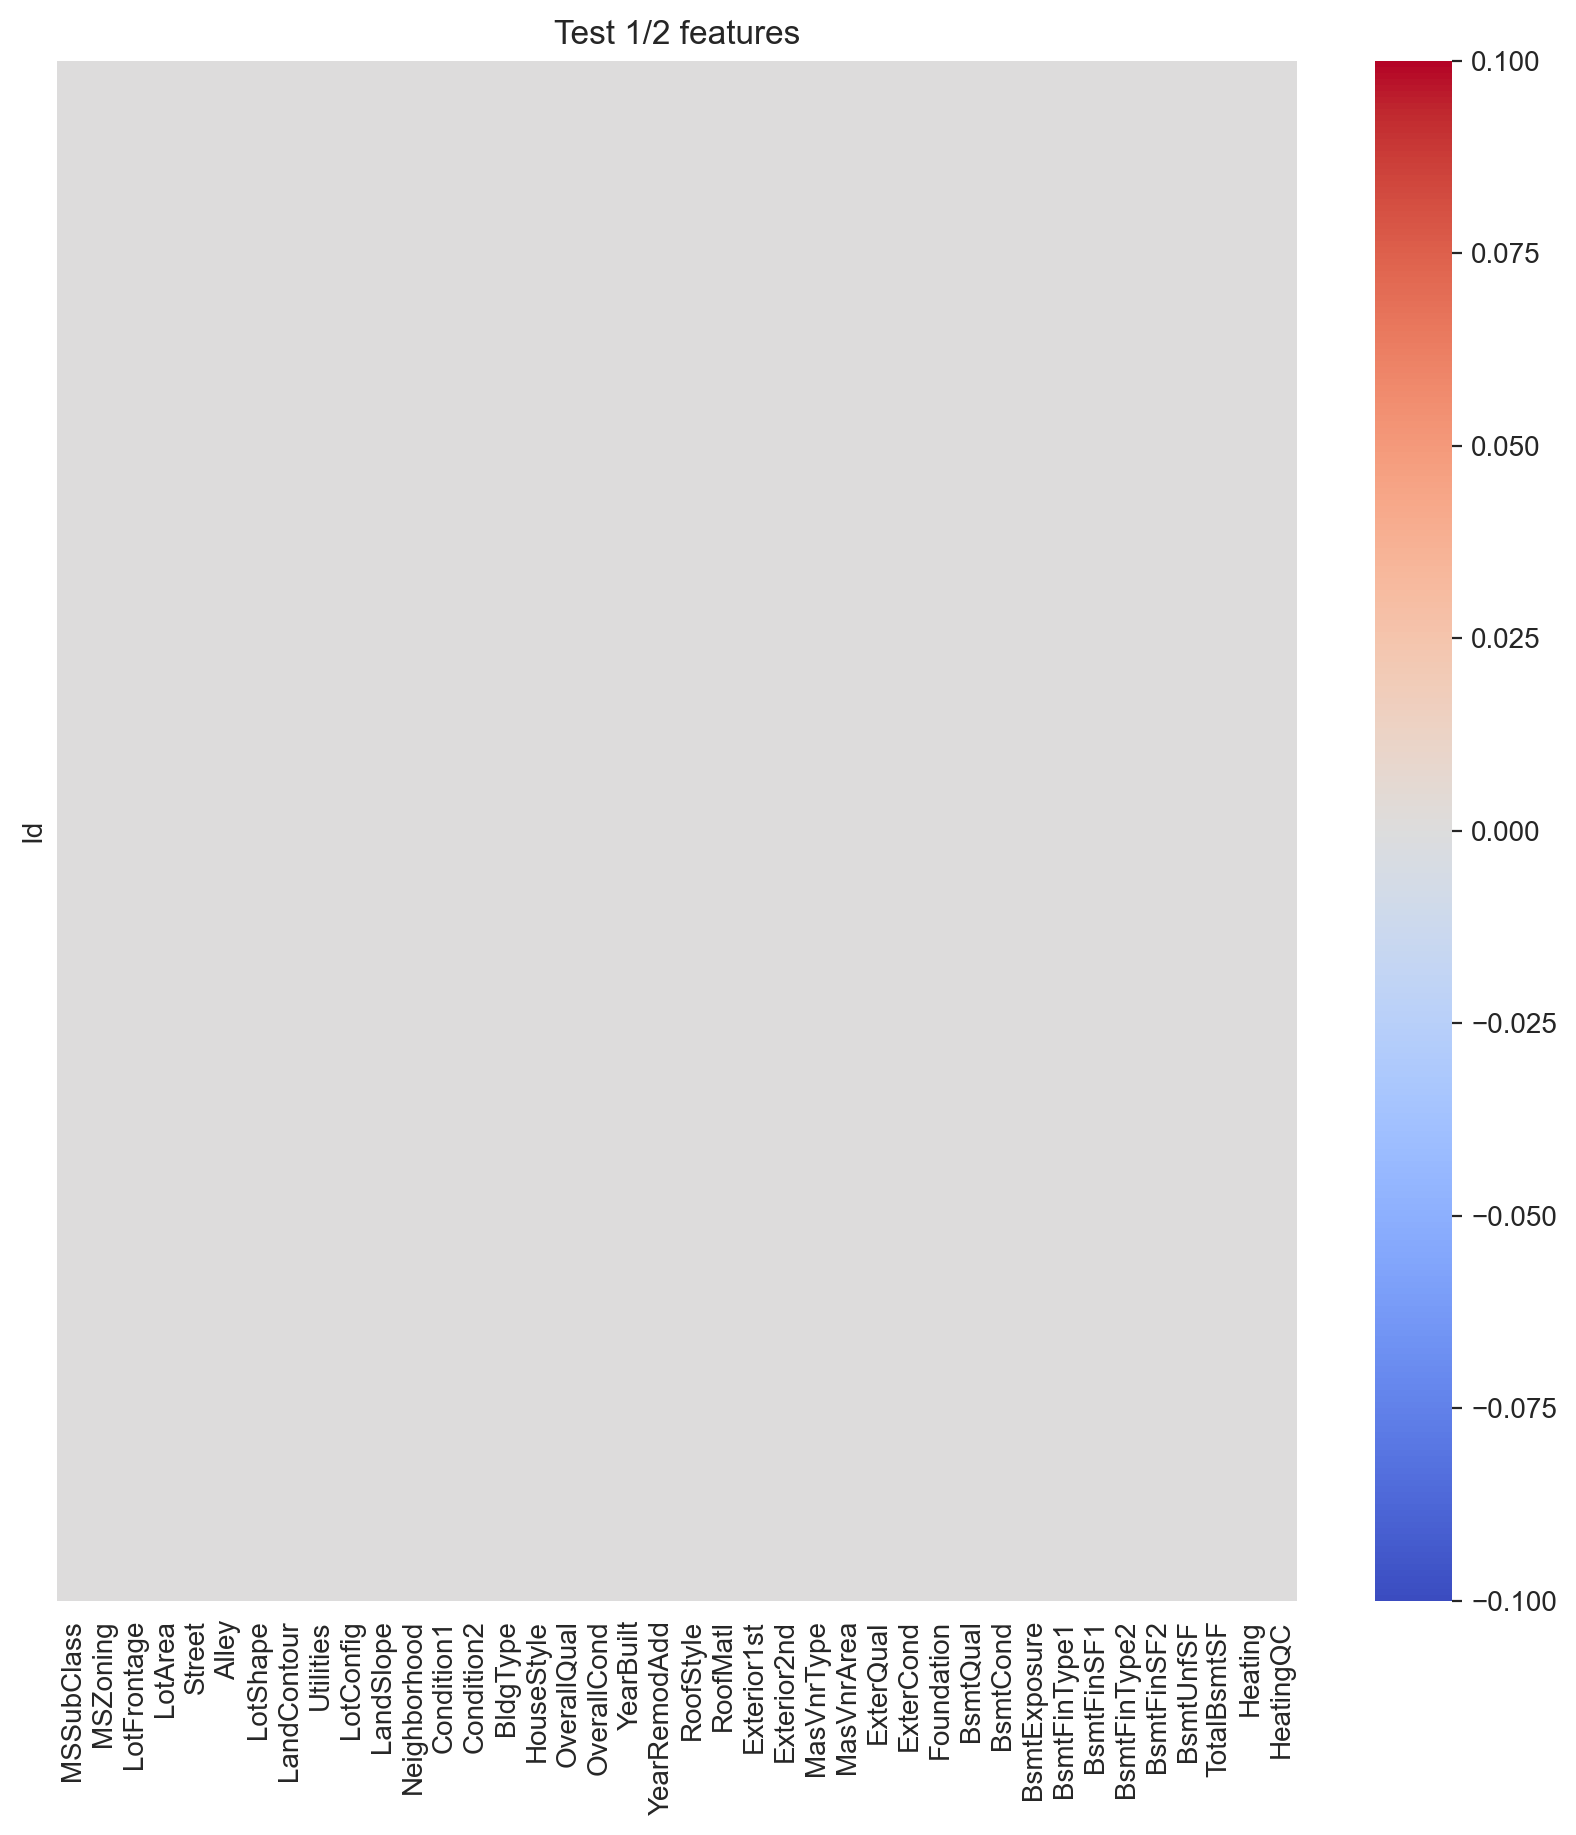

In [115]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(data=df_test.iloc[:, :40].isnull(), cmap='coolwarm', yticklabels=False)
plt.title('Test 1/2 features')
plt.show()

#### Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [116]:
df_train[df_train['Electrical'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1380,80,RL,73.0,9735,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


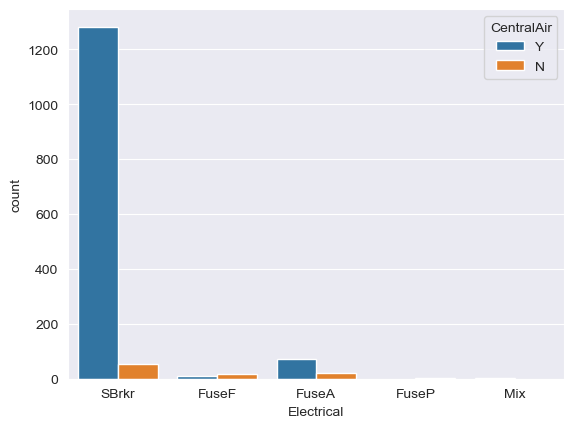

In [117]:
sns.countplot(data=df_train, x='Electrical', hue='CentralAir')
plt.show()

In [118]:
df_train[df_train['CentralAir'] == 'Y']['Electrical'].value_counts()

Electrical
SBrkr    1282
FuseA      72
FuseF       9
Mix         1
Name: count, dtype: int64

In [119]:
df_train['Electrical'] = df_train['Electrical'].fillna('SBrkr')

In [120]:
df_train['Electrical'].isna().any(), df_test['Electrical'].isna().any()

(np.False_, np.False_)

#### BsmtFullBath: Basement full bathrooms, BsmtHalfBath: Basement half bathrooms



In [121]:
bath_cols = [n for n in df_test.columns if 'Bath' in n]
bsmt_cols = [n for n in df_test.columns if 'Bsmt' in n]

In [122]:
df_test[df_test['BsmtHalfBath'].isna()][bsmt_cols + bath_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath
Id,,,,,,,,,,,,,,,
2121,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1,0
2189,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,NaN,NaN,NaN,NaN,3,1


In [123]:
df_test['BsmtHalfBath'].value_counts()

BsmtHalfBath
0.0    1364
1.0      91
2.0       2
Name: count, dtype: int64

In [124]:
df_test['BsmtFullBath'] = df_test['BsmtFullBath'].fillna(0.0)
df_test['BsmtHalfBath'] = df_test['BsmtHalfBath'].fillna(0.0)

In [125]:
df_test['BsmtFullBath'].isna().any(), df_test['BsmtHalfBath'].isna().any()

(np.False_, np.False_)

#### KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [126]:
df_test['KitchenQual'].value_counts()

KitchenQual
TA    757
Gd    565
Ex    105
Fa     31
Name: count, dtype: int64

In [127]:
df_test['KitchenQual'] = df_test['KitchenQual'].fillna('TA')

In [128]:
df_test['KitchenQual'].isna().any()

np.False_

#### Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [129]:
df_test['Functional'].value_counts()

Functional
Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: count, dtype: int64

In [130]:
df_test['Functional'] = df_test['Functional'].fillna('Typ')

In [131]:
df_test['Functional'].isna().any()

np.False_

#### Fireplaces: Number of fireplaces

#### FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

In [132]:
df_train[df_train['FireplaceQu'].isna()]['Fireplaces'].value_counts()

Fireplaces
0    690
Name: count, dtype: int64

In [133]:
df_test[df_test['FireplaceQu'].isna()]['Fireplaces'].value_counts()

Fireplaces
0    730
Name: count, dtype: int64

The only value of number of Fireplaces is 0 (when FireplaceQu is NaN), so that means No Fireplace (NA)

In [134]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('NA')
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('NA')

In [135]:
df_train['FireplaceQu'].isna().any(), df_test['FireplaceQu'].isna().any()

(np.False_, np.False_)

#### Garage

Let's see which garage features have missing values

In [136]:
df_train.iloc[:, 57:64].isna().any()

GarageType       True
GarageYrBlt      True
GarageFinish     True
GarageCars      False
GarageArea      False
GarageQual       True
GarageCond       True
dtype: bool

In [137]:
df_test.iloc[:, 57:64].isna().any()

GarageType      True
GarageYrBlt     True
GarageFinish    True
GarageCars      True
GarageArea      True
GarageQual      True
GarageCond      True
dtype: bool

In [138]:
garage_cols = [n for n in df_test.columns if 'Garage' in n]

We have 1 object with mising data about Garage (all we know that it is Detchd Type)

In [139]:
df_test[df_test['GarageArea'].isna()][garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2577,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
df_train[df_train['GarageType'] == 'Detchd'][garage_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
4,Detchd,1998.0,Unf,3,642,TA,TA
9,Detchd,1931.0,Unf,2,468,Fa,TA
11,Detchd,1965.0,Unf,1,384,TA,TA
13,Detchd,1962.0,Unf,1,352,TA,TA
16,Detchd,1991.0,Unf,2,576,TA,TA


In [141]:
cond_detchd = df_train['GarageType'] == 'Detchd'

In [142]:
GarageYrBltMean = np.round(df_train[cond_detchd]['GarageYrBlt'].mean())
GarageYrBltMean

np.float64(1963.0)

In [143]:
df_train[cond_detchd]['GarageFinish'].value_counts()

GarageFinish
Unf    354
RFn     19
Fin     14
Name: count, dtype: int64

In [144]:
GarageAreaMean = np.round(df_train[cond_detchd]['GarageArea'].mean())
GarageAreaMean

np.float64(427.0)

In [145]:
df_train[cond_detchd]['GarageQual'].value_counts()

GarageQual
TA    340
Fa     37
Gd      4
Ex      3
Po      3
Name: count, dtype: int64

In [146]:
df_train[cond_detchd]['GarageCond'].value_counts()

GarageCond
TA    345
Fa     31
Po      7
Ex      2
Gd      2
Name: count, dtype: int64

In [147]:
cond_detchd = df_test['GarageType'] == 'Detchd'

In [148]:
df_test.loc[cond_detchd, 'GarageYrBlt'] = GarageYrBltMean
df_test.loc[cond_detchd, 'GarageFinish'] = 'Unf'
df_test.loc[cond_detchd, 'GarageCars'] = 1.0
df_test.loc[cond_detchd, 'GarageArea'] = GarageAreaMean
df_test.loc[cond_detchd, 'GarageQual'] = 'TA'
df_test.loc[cond_detchd, 'GarageCond'] = 'TA'

In [149]:
df_test['GarageCars'].isna().any(), df_test['GarageArea'].isna().any()

(np.False_, np.False_)

In [150]:
garage_str_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

In [151]:
garage_NA_cond_train = df_train[garage_str_cols].isna().all(axis=1)
garage_NA_cond_test= df_test[garage_str_cols].isna().all(axis=1)

Fillinf Year with -1 if there is no Garage

In [152]:
df_train.loc[garage_NA_cond_train, 'GarageYrBlt'] = df_train.loc[garage_NA_cond_train, 'GarageYrBlt'].fillna(-1)
df_test.loc[garage_NA_cond_test, 'GarageYrBlt'] = df_test.loc[garage_NA_cond_test, 'GarageYrBlt'].fillna(-1)

In [153]:
df_train[garage_NA_cond_train][garage_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,NaN,-1.0,NaN,0,0,NaN,NaN
49,NaN,-1.0,NaN,0,0,NaN,NaN
79,NaN,-1.0,NaN,0,0,NaN,NaN
89,NaN,-1.0,NaN,0,0,NaN,NaN
90,NaN,-1.0,NaN,0,0,NaN,NaN


In [154]:
df_test[garage_NA_cond_test][garage_cols].head()

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
1514,NaN,-1.0,NaN,0.0,0.0,NaN,NaN
1532,NaN,-1.0,NaN,0.0,0.0,NaN,NaN
1540,NaN,-1.0,NaN,0.0,0.0,NaN,NaN
1553,NaN,-1.0,NaN,0.0,0.0,NaN,NaN
1557,NaN,-1.0,NaN,0.0,0.0,NaN,NaN


Fill NaN in other columns with NA (no Garage)

In [155]:
df_train.loc[garage_NA_cond_train, garage_str_cols] = df_train.loc[garage_NA_cond_train, garage_str_cols].fillna('NA')
df_test.loc[garage_NA_cond_test, garage_str_cols] = df_test.loc[garage_NA_cond_test, garage_str_cols].fillna('NA')

In [156]:
df_train[garage_cols].isna().any()

GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
GarageQual      False
GarageCond      False
dtype: bool

In [157]:
df_test[garage_cols].isna().any()

GarageType      False
GarageYrBlt     False
GarageFinish    False
GarageCars      False
GarageArea      False
GarageQual      False
GarageCond      False
dtype: bool

#### PoolArea: Pool area in square feet

#### PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [158]:
df_train[df_train['PoolQC'].isna()]['PoolArea'].value_counts()

PoolArea
0    1453
Name: count, dtype: int64

Where PoolArea is 0 fill NaN with NA because there is no Pool

In [159]:
df_train.loc[df_train['PoolArea'] == 0, 'PoolQC'] = df_train.loc[df_train['PoolArea'] == 0, 'PoolQC'].fillna('NA')

In [160]:
df_train['PoolQC'].isna().any()

np.False_

In [161]:
df_test[df_test['PoolQC'].isna()]['PoolArea'].value_counts()

PoolArea
0      1453
368       1
444       1
561       1
Name: count, dtype: int64

In [162]:
df_test[~df_test['PoolQC'].isna()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1975,20,RL,106.0,12720,Pave,NA,Reg,HLS,AllPub,Inside,Mod,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,MetalSd,MetalSd,Stone,680.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2257.0,Unf,0.0,278.0,2535.0,GasA,Ex,Y,SBrkr,2470,0,0,2470,2.0,0.0,1,1,1,1,Ex,7,Typ,2,Gd,Attchd,2003.0,Fin,3.0,789.0,TA,TA,Y,154,65,0,0,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal
2574,20,RL,70.0,18044,Pave,NA,IR1,HLS,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,8,5,1986,1986,Gable,CompShg,WdShing,Plywood,NA,0.0,Gd,TA,CBlock,Gd,TA,No,Unf,0.0,Unf,0.0,279.0,279.0,GasA,Gd,Y,SBrkr,2726,0,0,2726,0.0,0.0,2,1,2,1,Gd,6,Typ,1,Gd,Attchd,1986.0,Fin,2.0,691.0,Gd,Gd,Y,216,64,169,0,0,228,Ex,NaN,NaN,0,8,2007,WD,Normal
2711,80,RL,100.0,14330,Pave,NA,IR1,Low,AllPub,Corner,Gtl,Veenker,Norm,Norm,1Fam,SLvl,7,4,1974,1974,Gable,CompShg,WdShing,Wd Sdng,BrkFace,145.0,Gd,Fa,CBlock,Gd,TA,Gd,ALQ,1023.0,BLQ,497.0,228.0,1748.0,GasA,Gd,Y,SBrkr,2151,495,0,2646,1.0,2.0,2,0,3,1,Gd,9,Mod,4,TA,Attchd,1974.0,RFn,2.0,550.0,TA,TA,Y,641,100,0,0,0,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal


In [163]:
df_test[df_test['PoolQC'].isna() & (df_test['PoolArea'] != 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2421,20,RL,75.0,9532,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,6,1953,1953,Gable,CompShg,VinylSd,VinylSd,NA,0.0,TA,TA,CBlock,TA,TA,No,BLQ,595.0,Rec,354.0,156.0,1105.0,GasA,Gd,Y,SBrkr,1647,0,0,1647,1.0,0.0,1,0,3,1,TA,6,Min1,1,Fa,Attchd,1953.0,Fin,1.0,280.0,TA,TA,Y,225,0,0,0,0,368,NaN,GdPrv,NaN,0,2,2007,WD,Normal
2504,50,RL,104.0,23920,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,NA,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,1822,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984.0,Unf,2.0,515.0,TA,TA,P,0,195,1012,0,0,444,NaN,NaN,NaN,0,4,2007,WD,Normal
2600,20,RL,200.0,43500,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,3,5,1953,1953,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,NA,NA,NA,NA,0.0,NA,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,2034,0,0,2034,0.0,0.0,1,0,2,1,TA,9,Min1,0,NA,2Types,1953.0,RFn,4.0,1041.0,TA,TA,N,483,266,0,0,0,561,NaN,GdPrv,NaN,0,6,2007,WD,Normal


In [164]:
df_test.loc[df_test['PoolArea'] == 0, 'PoolQC'] = df_test.loc[df_test['PoolArea'] == 0, 'PoolQC'].fillna('NA')

Other 3 cases probably missing info so filling with Gd

In [165]:
df_test['PoolQC'] = df_test['PoolQC'].fillna('Gd')

In [166]:
df_test['PoolQC'].isna().any()

np.False_

#### Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

Let's assume all NaN is No fence

In [167]:
df_train['Fence'] = df_train['Fence'].fillna('NA')
df_test['Fence'] = df_test['Fence'].fillna('NA')

In [168]:
df_train['Fence'].isna().any(), df_test['Fence'].isna().any()

(np.False_, np.False_)

#### MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
#### MiscVal: $Value of miscellaneous feature

In [169]:
df_train[df_train['MiscFeature'].isna()]['MiscVal'].value_counts()

MiscVal
0    1406
Name: count, dtype: int64

0 MiscVal means No MiscFeature

In [170]:
df_train['MiscFeature'] = df_train['MiscFeature'].fillna('NA')

In [171]:
df_test[df_test['MiscFeature'].isna()]['MiscVal'].value_counts()

MiscVal
0        1407
17000       1
Name: count, dtype: int64

In [172]:
df_test[df_test['MiscVal'] > 0]['MiscFeature'].value_counts()

MiscFeature
Shed    45
Gar2     3
Othr     2
Name: count, dtype: int64

In [173]:
df_test[df_test['MiscFeature'].isna() & (df_test['MiscVal'] != 0)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2550,20,RL,128.0,39290,Pave,NA,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.0,Unf,0.0,1085.0,5095.0,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.0,1.0,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.0,Fin,3.0,1154.0,TA,TA,Y,546,484,0,0,0,0,NA,NA,NaN,17000,10,2007,New,Partial


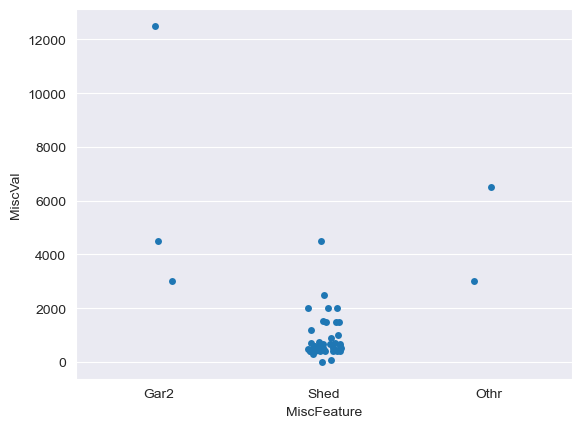

In [174]:
sns.stripplot(data=df_test, x='MiscFeature', y='MiscVal')
plt.show()

I don't know let's put Gar2

In [175]:
df_test.loc[df_test['MiscVal'] > 0, 'MiscFeature'] = df_test.loc[df_test['MiscVal'] > 0, 'MiscFeature'].fillna('Gar2')

Other missing values filling with NA (because MiscVal is 0)

In [176]:
df_test['MiscFeature'] = df_test['MiscFeature'].fillna('NA')

In [177]:
df_train['MiscFeature'].isna().any(), df_test['MiscFeature'].isna().any()

(np.False_, np.False_)

#### SaleType: Type of sale

In [178]:
df_train['SaleType'].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [179]:
df_test['SaleType'] = df_test['SaleType'].fillna('WD')

In [180]:
df_train.isna().any().any(), df_test.isna().any().any()

(np.False_, np.False_)

All NaN values filled in both train and test data!

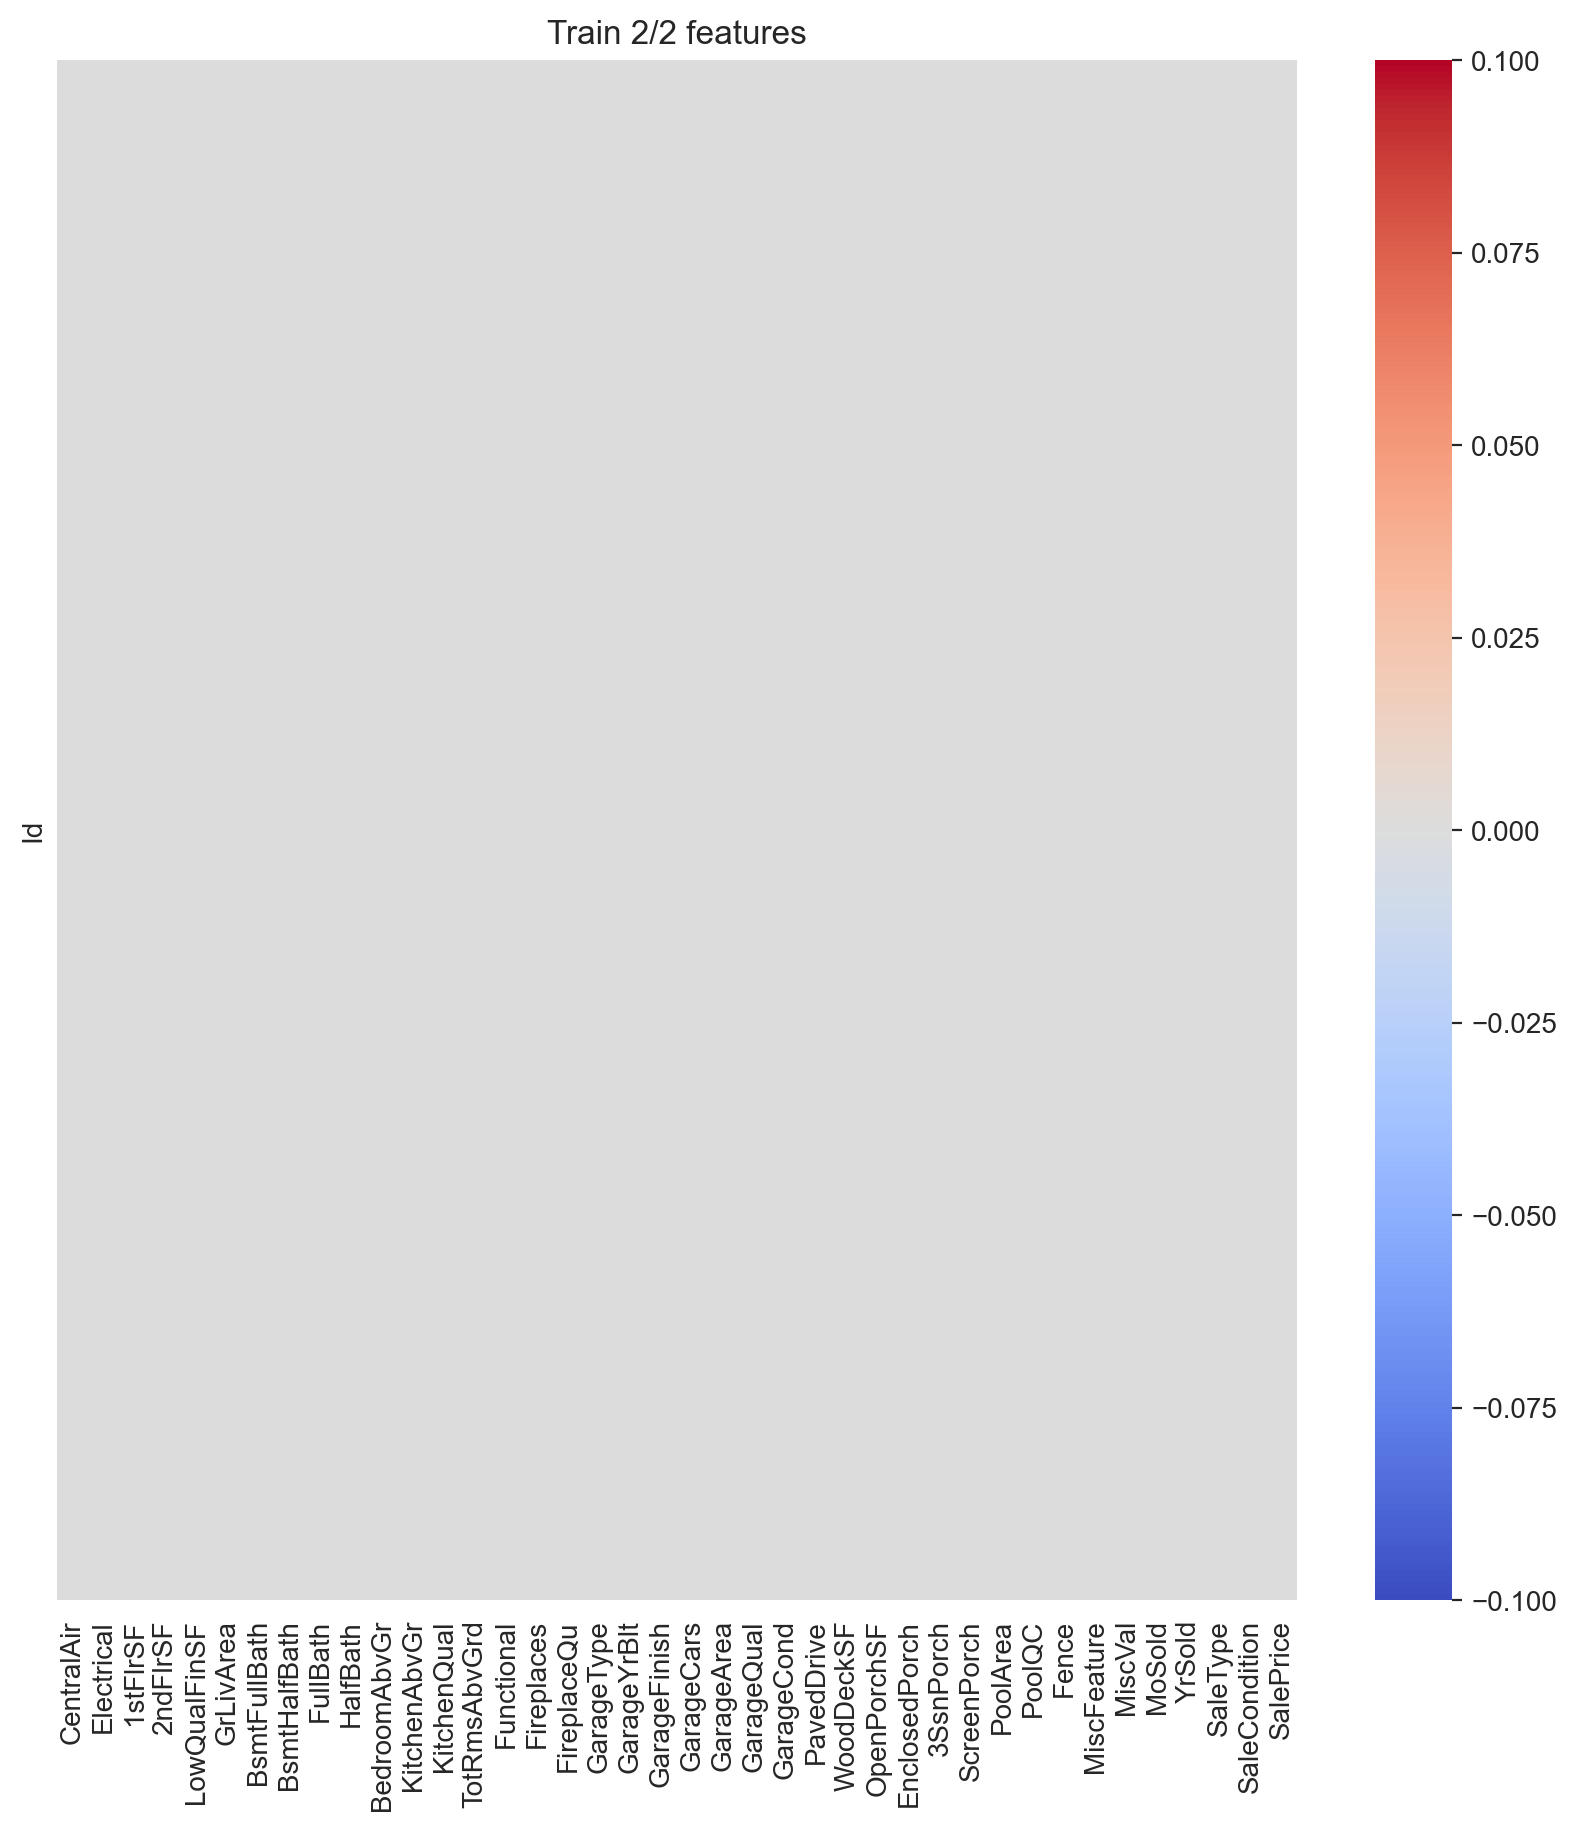

In [181]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(data=df_train.iloc[:, 40:].isnull(), cmap='coolwarm', yticklabels=False)
plt.title('Train 2/2 features')
plt.show()

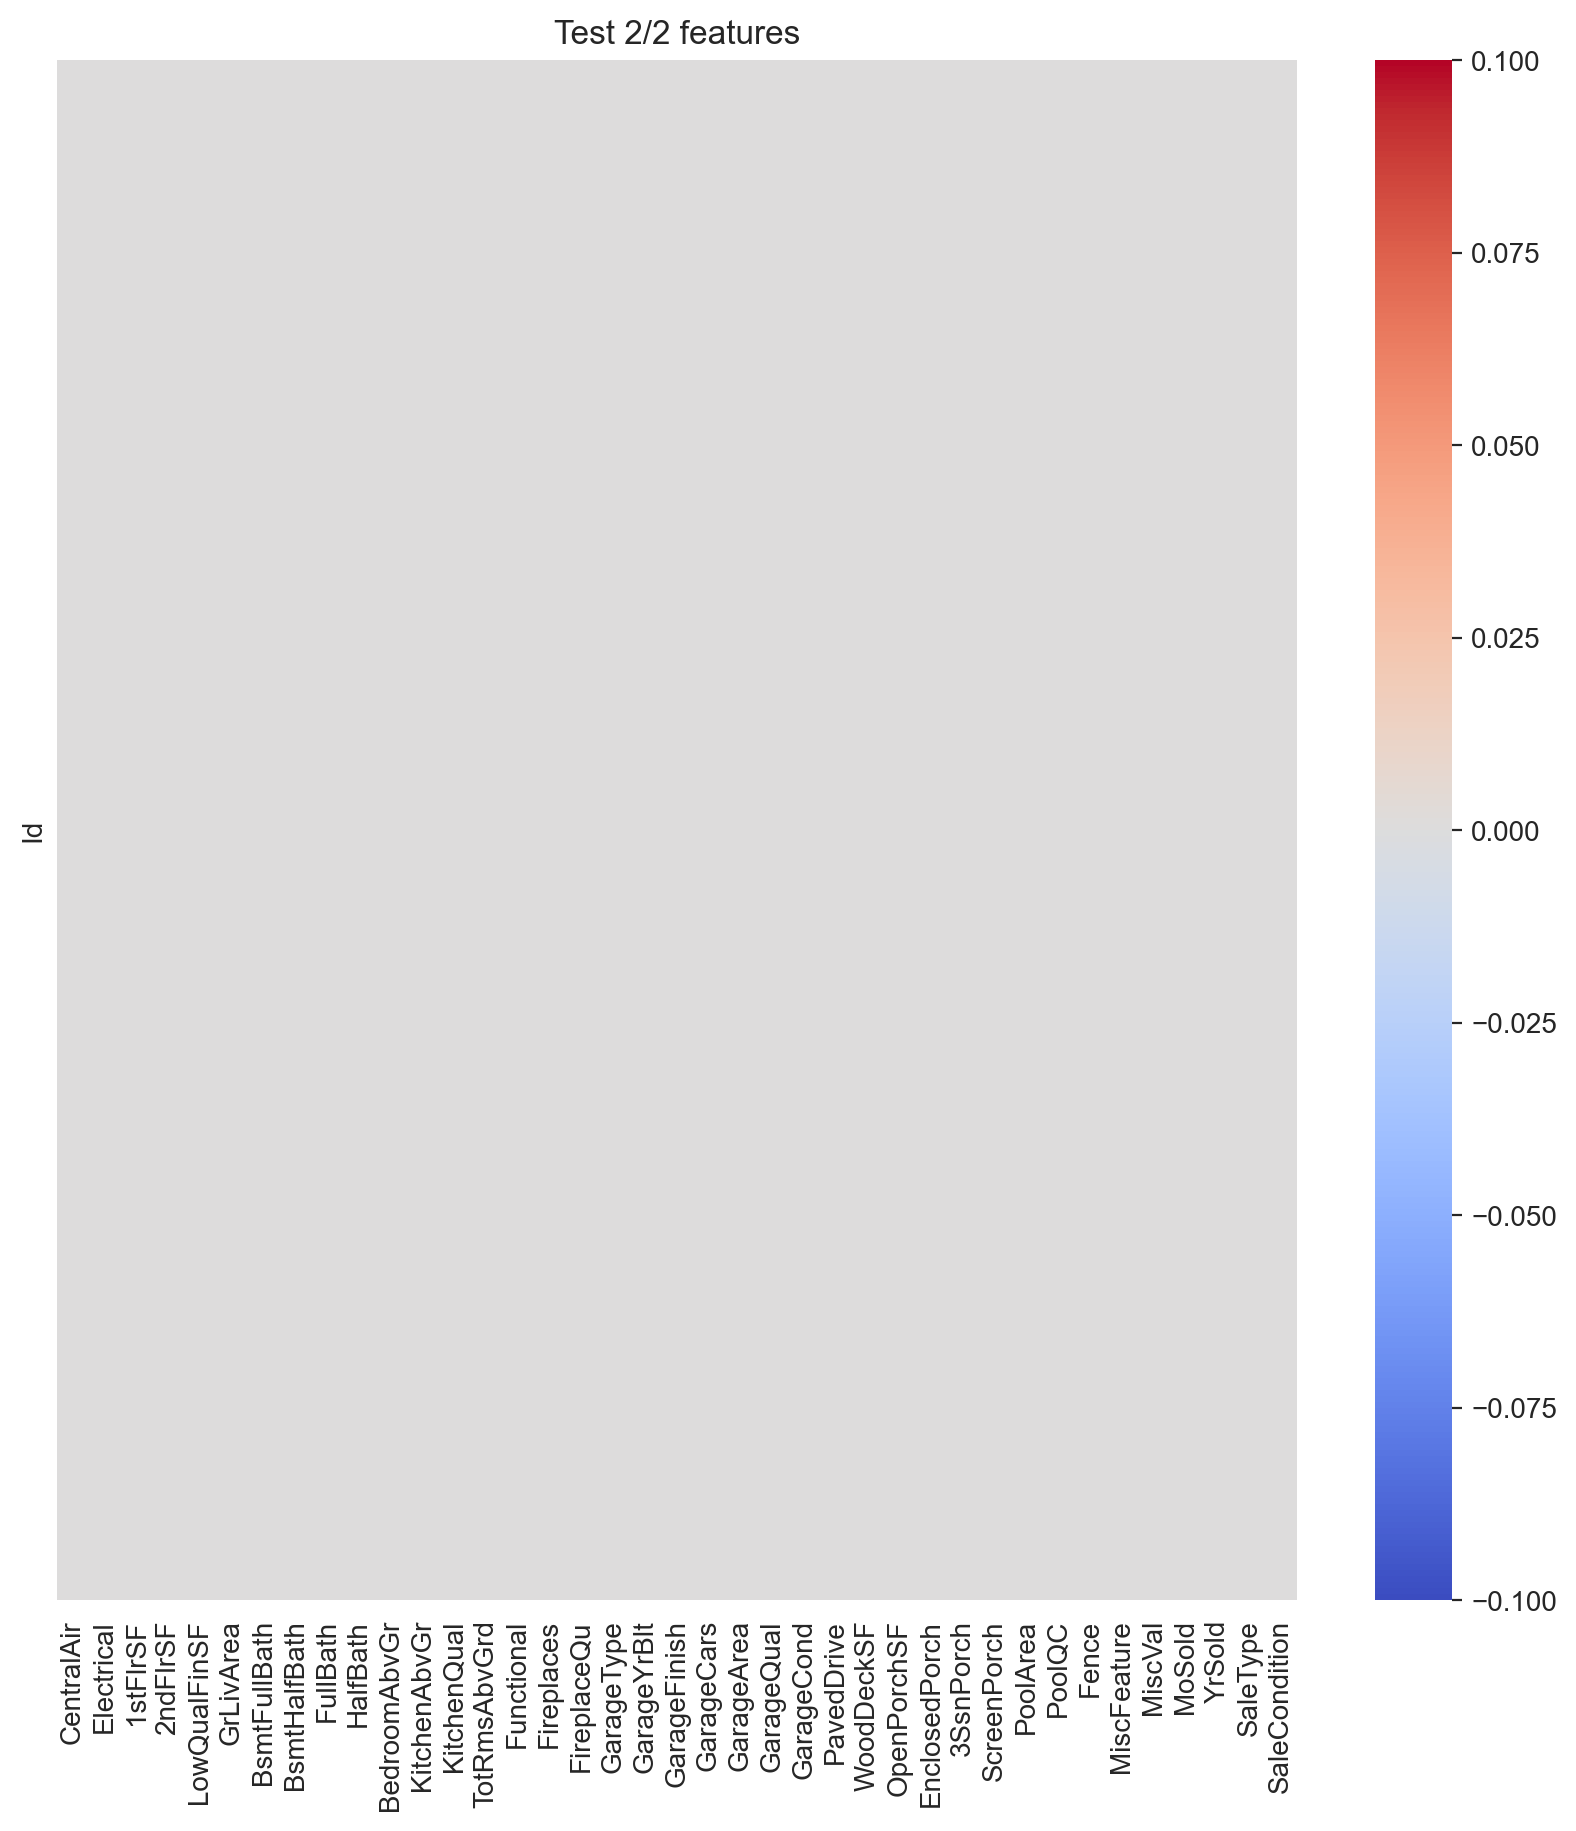

In [182]:
plt.figure(figsize=(10, 10), dpi=200)
sns.heatmap(data=df_test.iloc[:, 40:].isnull(), cmap='coolwarm', yticklabels=False)
plt.title('Test 2/2 features')
plt.show()

### Converting int categories into object

In [183]:
df_train['MSSubClass'] = df_train['MSSubClass'].astype('object')
df_test['MSSubClass'] = df_test['MSSubClass'].astype('object')

In [184]:
df_train['MoSold'] = df_train['MoSold'].astype('object')
df_test['MoSold'] = df_test['MoSold'].astype('object')

In [185]:
df_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']] = df_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].astype('object')
df_test[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']] = df_test[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']].astype('object')

### Deleting outliers from train data

In [186]:
numeric_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                    'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
                    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

In [187]:
def regplot_target_of_num_features(i):
    feature = numeric_features[int(i/2)]
    plt.subplot(19, 2, i+1)
    sns.regplot(data=df_train[df_train[feature] > 0], x=feature, y='SalePrice')
    plt.subplot(19, 2, i+2)
    sns.boxplot(data=df_train[df_train[feature] > 0], x=feature)

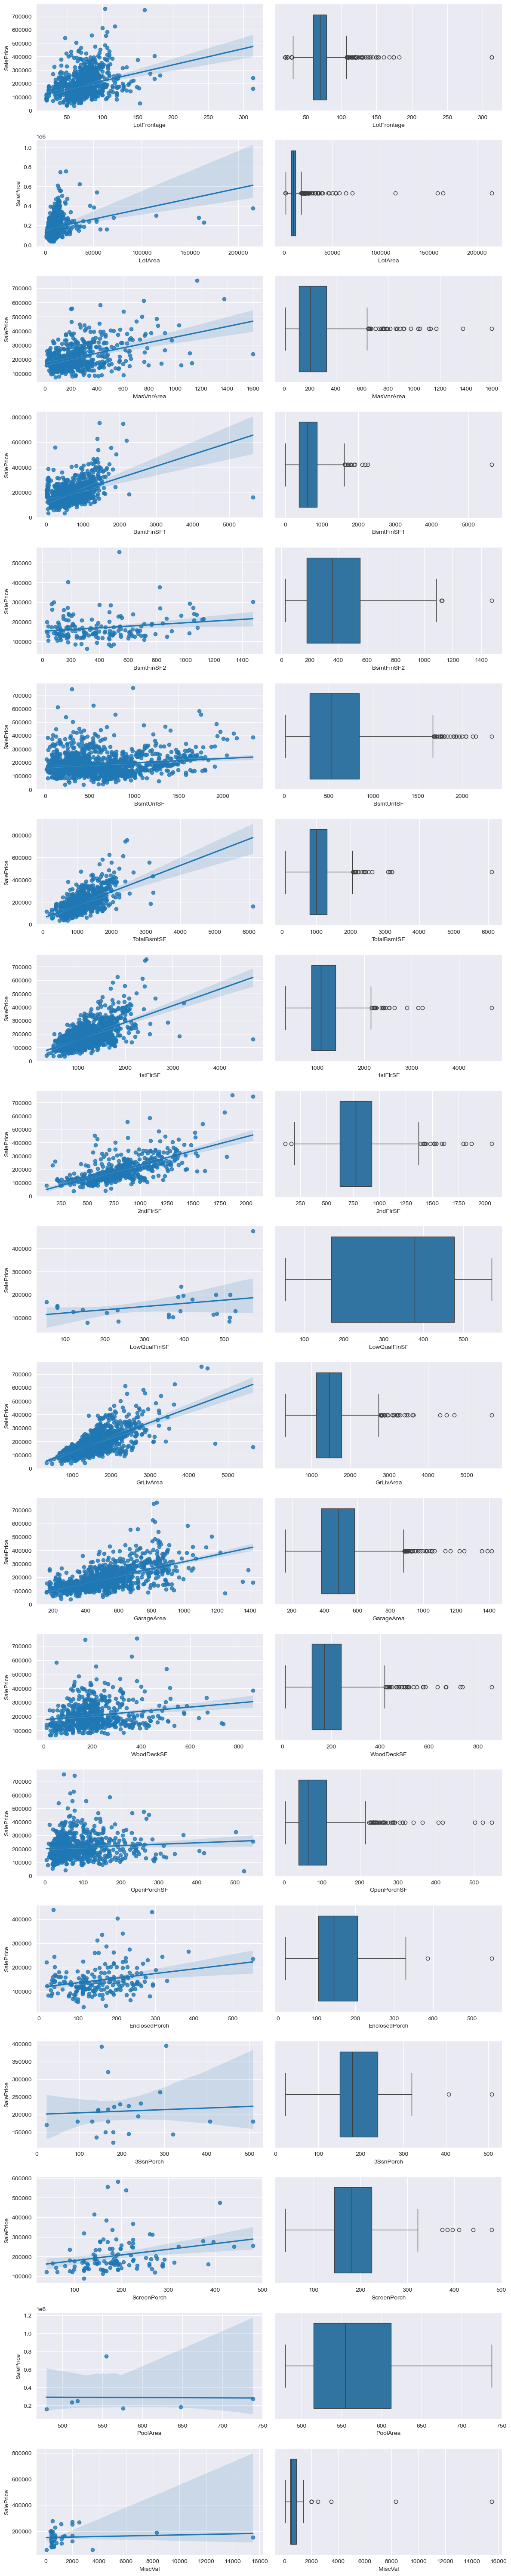

In [188]:
plt.figure(figsize=(12, 60))
for i in range(0, 37, 2):
    regplot_target_of_num_features(i)
plt.tight_layout()
plt.show()

In [189]:
cond = (df_train['LotFrontage'] > 200) | (df_train['LotArea'] > 100000) | (df_train['MasVnrArea'] > 1160) \
    | (df_train['BsmtFinSF1'] > 3000) | (df_train['BsmtFinSF2'] > 1200) | (df_train['TotalBsmtSF'] > 4000) \
    | (df_train['1stFlrSF'] > 4000) | (df_train['2ndFlrSF'] > 1750) | (df_train['GrLivArea'] > 4000) \
    | (df_train['GarageArea'] > 1230) | (df_train['MiscVal'] > 4000)

In [190]:
index = df_train[cond].index
df_train = df_train.drop(index=index)

### Splitting data

In [191]:
X_train = df_train.drop('SalePrice', axis=1)
y_train = df_train['SalePrice'].copy()

In [192]:
X_test = df_test.copy()

### Fixing target skewness

In [193]:
from scipy.stats import norm

In [194]:
def norm_distr_hustplot(func=lambda x: x):
    data = y_train.apply(func)
    sns.histplot(data=data, kde=True, bins=50, stat='density')
    x = np.linspace(data.min(), data.max(), 1000)
    mu, std = norm.fit(data)
    plt.plot(x, norm.pdf(x=x, loc=mu, scale=std), color='r')

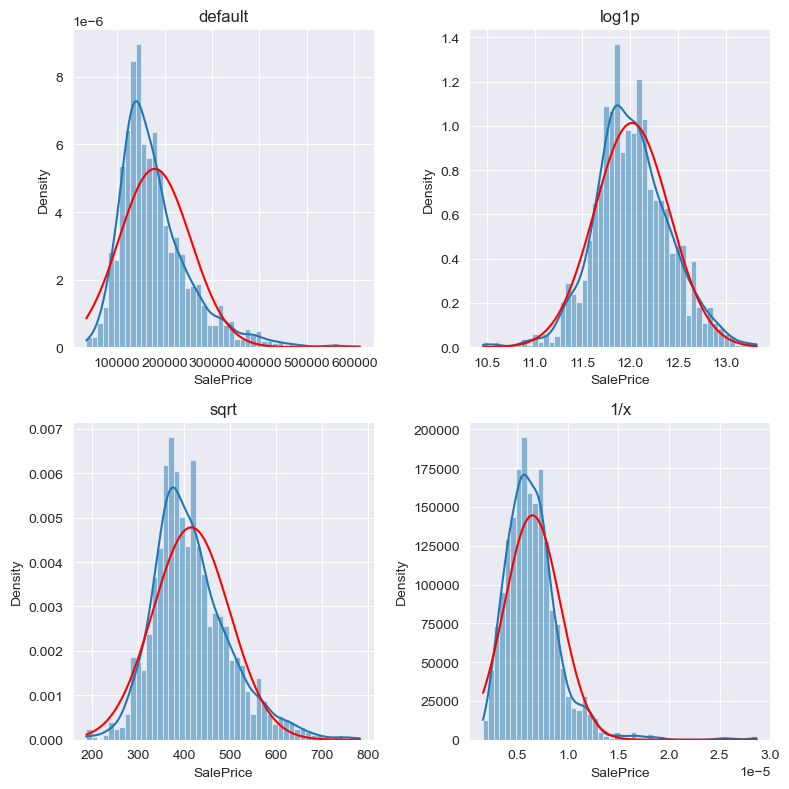

In [195]:
plt.figure(figsize=(8,8))
plt.subplot(2, 2, 1)
norm_distr_hustplot()
plt.title('default')

plt.subplot(2, 2, 2)
norm_distr_hustplot(np.log1p)
plt.title('log1p')

plt.subplot(2, 2, 3)
norm_distr_hustplot(np.sqrt)
plt.title('sqrt')

plt.subplot(2, 2, 4)
norm_distr_hustplot(lambda x: 1/x)
plt.title('1/x')

plt.tight_layout()
plt.show()

log1p is the best choice for this data

In [196]:
y_train = y_train.apply(np.log1p)

### Frequency encoding

We're replacing high cardinality features with number of their appearance in the data

In [197]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns

In [198]:
str_features = [n for n in X_train.columns if n not in numeric_features]

In [199]:
len(numeric_features), len(str_features)

(30, 49)

In [200]:
category_counts = X_train[str_features].nunique()

In [201]:
high_card_features = category_counts[category_counts > 10].index.tolist()

In [202]:
print(f'{len(high_card_features)} Features with many categories {high_card_features}')

8 Features with many categories ['MSSubClass', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'Exterior2nd', 'GarageYrBlt', 'MoSold']


In [203]:
X_train[high_card_features] = X_train[high_card_features].apply(lambda col: col.map(col.value_counts()))

In [204]:
X_test[high_card_features] = X_test[high_card_features].apply(lambda col: col.map(col.value_counts()))

In [205]:
X_train.isna().any().any(), X_test.isna().any().any()

(np.False_, np.False_)

### Fixing numeric features skewness

In [206]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns

If threshhold is greater than 0.5 we define feature as skewed

In [207]:
skew_values = X_train[numeric_features].skew().abs()
skewed_features = skew_values[skew_values > 0.5].index.to_list()

Apply boxcox transformation

In [208]:
from scipy.stats import boxcox

for feature in skewed_features:
    if (X_train[feature] <= 0).any().any() or (X_test[feature] <= 0).any().any():
        X_train[feature] += abs(X_train[feature].min()) + 0.01
        X_test[feature] += abs(X_test[feature].min()) + 0.01

    X_train[feature], fitted_lambda = boxcox(X_train[feature])
    X_test[feature] = boxcox(X_test[feature], lmbda=fitted_lambda)

### Feature Scaling

In [209]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric_features = X_train.select_dtypes(include=[np.number]).columns

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

### One-Hot Encoding

Encoding categorical variables with low cardinality using one-hot encoding

In [210]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns

str_features = [n for n in X_test.columns if n not in numeric_features]

In [211]:
X_train = pd.get_dummies(data=X_train, columns=str_features, drop_first=True)
X_test = pd.get_dummies(data=X_test, columns=str_features, drop_first=True)

Reindex columns so train and test data have same columns

In [212]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=False)

In [213]:
X_train.shape, X_test.shape

((1442, 209), (1459, 209))

In [214]:
X_train.isna().any().any(), X_test.isna().any().any()

(np.False_, np.False_)

## Modeling

In [215]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor

### Regression models

In [216]:
models = {
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor()
}

### Hypermarameters

In [221]:
params = {
    'ElasticNet': {
        'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3, 10],
        'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    },
    'Lasso': {
        'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3, 10],
    },
    'Ridge': {
        'alpha': [0.01, 0.03, 0.1, 0.3, 1, 3, 10],
        'solver': ['auto', 'saga', 'lsqr', 'svd'],
    },
    'RandomForestRegressor': {
        'n_estimators': [100, 250, 500],
        'max_depth': [12, 15, None],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 3]
    },
    'GradientBoostingRegressor': {
        'n_estimators': [500, 750, 1000],
        'learning_rate': [0.01, 0.03, 0.1, 0.3],
        'max_depth': [2, 5, 8],
        'min_samples_split': [2, 4],
        'min_samples_leaf': [1, 2, 3]
    },
    'XGBRegressor': {
        'n_estimators': [700, 1000],
        'max_depth': [2, 5],
        'learning_rate': [0.01, 0.1, 0.3],
        'min_child_weight': [1, 2],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'gamma': [0, 0.1],
        'reg_alpha': [ 0.1, 0.3],
        'reg_lambda': [1, 3],
    },
}

### Fitting the models

In [222]:
from time import perf_counter, sleep

kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_params = {}

for model_name, model in models.items():
    start = perf_counter()
    print(model_name)
    grid = GridSearchCV(estimator=model, param_grid=params[model_name], cv=kf, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=2)
    grid.fit(X_train, y_train)
    best_params[model_name] = grid.best_params_
    print('Best parameters:', grid.best_params_)
    print('Best score:', grid.best_score_)
    print(f'Fitting time: {perf_counter()-start:.3f} s', end='\n\n')
    sleep(1)

ElasticNet
Fitting 5 folds for each of 70 candidates, totalling 350 fits
Best parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Best score: -0.11742317175017943
Fitting time: 3.539 s

Lasso
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best parameters: {'alpha': 0.01}
Best score: -0.13517774312052977
Fitting time: 0.138 s

Ridge
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'alpha': 10, 'solver': 'auto'}
Best score: -0.11692021479471892
Fitting time: 4.441 s

RandomForestRegressor
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
Best score: -0.14134107187067935
Fitting time: 249.505 s

GradientBoostingRegressor
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


c:\Users\TemQ\miniconda3\envs\ml\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'learning_rate': 0.03, 'max_depth': 2, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 750}
Best score: -0.12685139374642354
Fitting time: 1208.428 s

XGBRegressor
Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\TemQ\miniconda3\envs\ml\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 700, 'reg_alpha': 0.3, 'reg_lambda': 3, 'subsample': 0.8}
Best score: -0.12135659090019715
Fitting time: 139.272 s



In [223]:
import json

with open('best_params.json', 'w', encoding='utf-8') as file:
    json.dump(best_params, file, indent=4)

### Stacking the models and making predictions

In [224]:
base_estimators = [
    ('ElasticNet', ElasticNet(**best_params['ElasticNet'])),
    ('Lasso', Lasso(**best_params['Lasso'])),
    ('Ridge', Ridge(**best_params['Ridge'])),
    ('RandomForestRegressor', RandomForestRegressor(**best_params['RandomForestRegressor'])),
    ('GradientBoostingRegressor', GradientBoostingRegressor(**best_params['GradientBoostingRegressor'])),
    ('XGBRegressor', XGBRegressor(**best_params['XGBRegressor']))
]

kf = KFold(n_splits=5, shuffle=True, random_state=101)

stacking_reg = StackingRegressor(estimators=base_estimators, cv=kf, n_jobs=-1, verbose=2)

stacking_reg.fit(X_train, y_train)

predictions = stacking_reg.predict(X_test)

predictions = np.expm1(predictions)

pred = pd.DataFrame(data=predictions, index=df_test.index, columns=['SalePrice'])

pred.to_csv('submission.csv')